# **Librería matplotlib**

## Componentes principales de un gráfico

| Componente | Qué es                         | Para qué sirve                                          | Ejemplo en tu código                              |
| ---------- | ------------------------------ | ------------------------------------------------------- | ------------------------------------------------- |
| **Figure** | Contenedor general del gráfico | Define el tamaño, layout y agrupa todos los subgráficos | `fig = plt.figure()` o `fig, ax = plt.subplots()` |
| **Canvas** | Superficie de renderizado      | Dibuja la Figure en pantalla o la guarda como imagen    | `plt.show()` / `fig.savefig()`                    |
| **Axes**   | Área de dibujo                 | Representa un gráfico individual dentro de la Figure    | `ax = fig.add_subplot()`                          |
| **Axis**   | Ejes X e Y                     | Controlan escalas, límites, ticks y etiquetas           | `ax.set_xlim()`, `ax.set_xlabel()`                |
| **Artist** | Elementos visuales             | Todo lo que *se ve* en el gráfico                       | líneas, puntos, textos, grids                     |


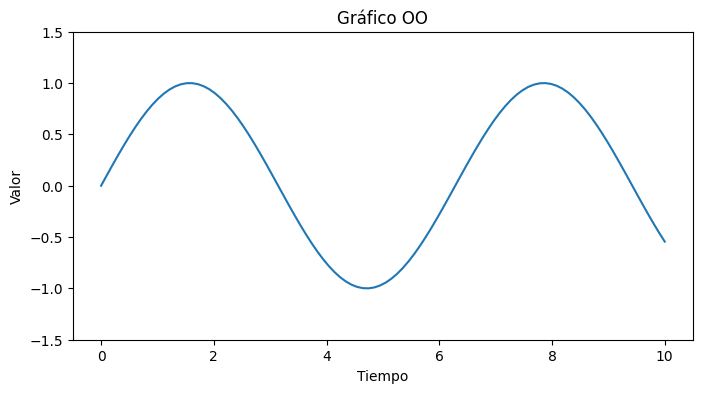

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
x = np.linspace(0, 10, 100)   # 100 puntos entre 0 y 10
y = np.sin(x)                 # seno de x

plt.style.use('default')
fig, ax = plt.subplots(figsize=(8, 4))  # Figure y Axes

ax.plot(x, y)
ax.set_title("Gráfico OO")
ax.set_xlabel("Tiempo")
ax.set_ylabel("Valor")

# Opcional: pequeños toques para que se vea más claro
ax.grid(False)
ax.set_ylim(-1.5, 1.5)  #controla el eje Y

plt.show()

La idea central:

* Figure arriba → el contenedor total del gráfico
* Axes dentro de la Figure → las áreas donde realmente se dibuja
* Axis (x e y) dentro de Axes → controlan escalas, ticks y etiquetas
* Canvas → la superficie donde finalmente se renderiza
* Artist → lo que se ve

## Crear un gráfico con modelo de orientación a objetos

Matplotlib usando pyplot

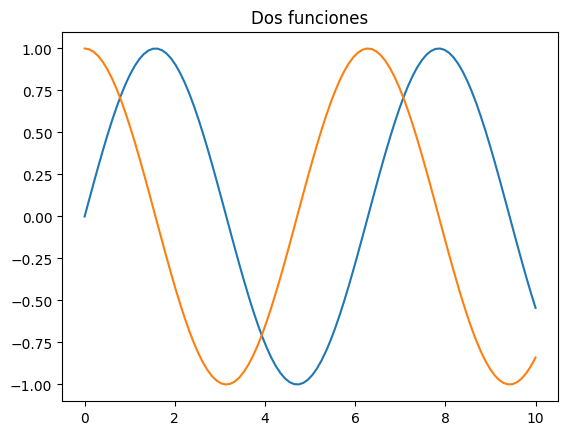

In [9]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.title("Dos funciones")
plt.show()

Matplotlib usando el modelo orientado a objetos
* Se dice que matplotlib tiene un modelo de orientación a objetos (OO) porque te permite trabajar directamente con los objetos que componen un gráfico, en lugar de usar funciones globales.

¿Por qué es "orientado a objetos"?
Porque trabajas con instancias de clases:

* Figure: El objeto que representa toda la ventana/imagen (el lienzo completo)

* Axes: El objeto que representa el área de trazado (donde van los datos)

* Cada elemento (líneas, texto, ejes) es un objeto que puedes manipular

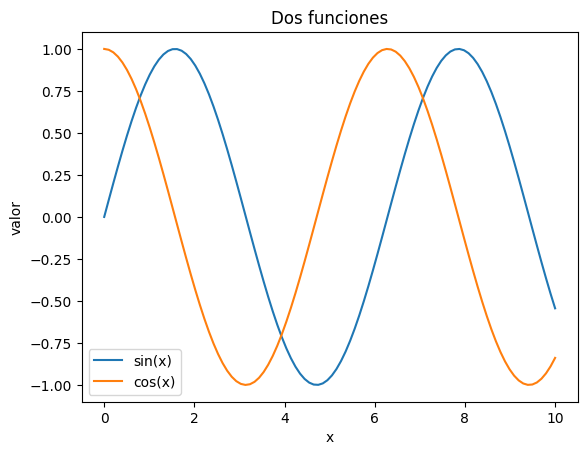

In [10]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), label="sin(x)")
ax.plot(x, np.cos(x), label="cos(x)")
ax.set_title("Dos funciones")
ax.set_xlabel("x")
ax.set_ylabel("valor")
ax.legend()
plt.show()

## Figuras y subgráficos

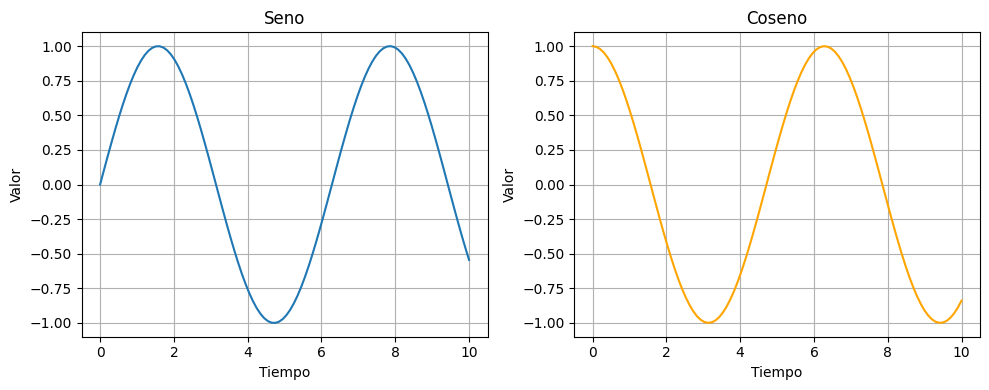

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Crear figura y subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Primer gráfico
axes[0].plot(x, y1)
axes[0].set_title("Seno")
axes[0].set_xlabel("Tiempo")
axes[0].set_ylabel("Valor")
axes[0].grid(True)

# Segundo gráfico
axes[1].plot(x, y2, color="orange")
axes[1].set_title("Coseno")
axes[1].set_xlabel("Tiempo")
axes[1].set_ylabel("Valor")
axes[1].grid(True)

# Ajuste de espacios
fig.tight_layout()
plt.show()


**3 gráficos**

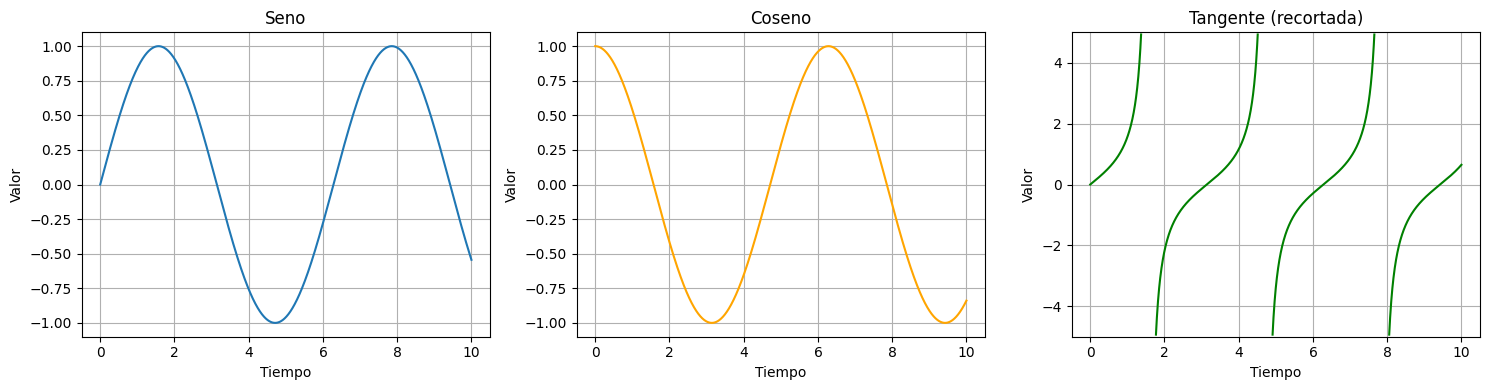

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
x = np.linspace(0, 10, 2000)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# Enmascarar valores "explosivos" de la tangente (evita líneas verticales gigantes)
y3 = np.where(np.abs(y3) > 5, np.nan, y3)  # umbral ajustable (5)

# Crear figura y subgráficos (1 fila, 3 columnas)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# 1) Seno
axes[0].plot(x, y1)
axes[0].set_title("Seno")
axes[0].set_xlabel("Tiempo")
axes[0].set_ylabel("Valor")
axes[0].grid(True)

# 2) Coseno
axes[1].plot(x, y2, color="orange")
axes[1].set_title("Coseno")
axes[1].set_xlabel("Tiempo")
axes[1].set_ylabel("Valor")
axes[1].grid(True)

# 3) Tangente
axes[2].plot(x, y3, color="green")
axes[2].set_title("Tangente (recortada)")
axes[2].set_xlabel("Tiempo")
axes[2].set_ylabel("Valor")
axes[2].grid(True)
axes[2].set_ylim(-5, 5)  # para que se entienda (coherente con el recorte)

fig.tight_layout()
plt.show()


## Ejemplo de subgráficos

Text(0.5, 1.0, 'Barras')

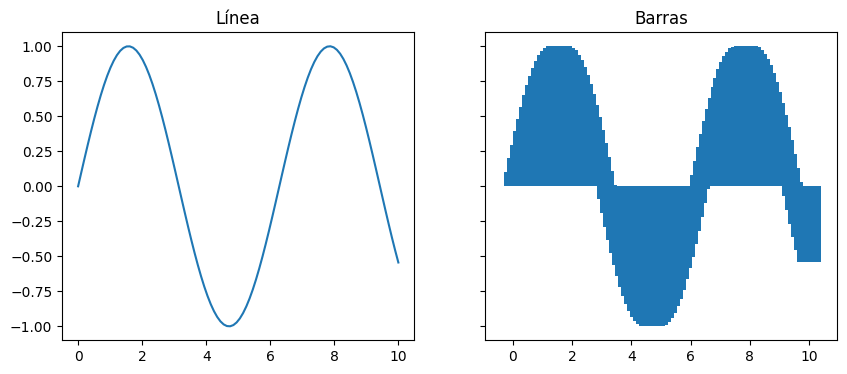

In [65]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axs[0].plot(x, y)
axs[0].set_title("Línea")

axs[1].bar(x, y)
axs[1].set_title("Barras")


* sharex=True

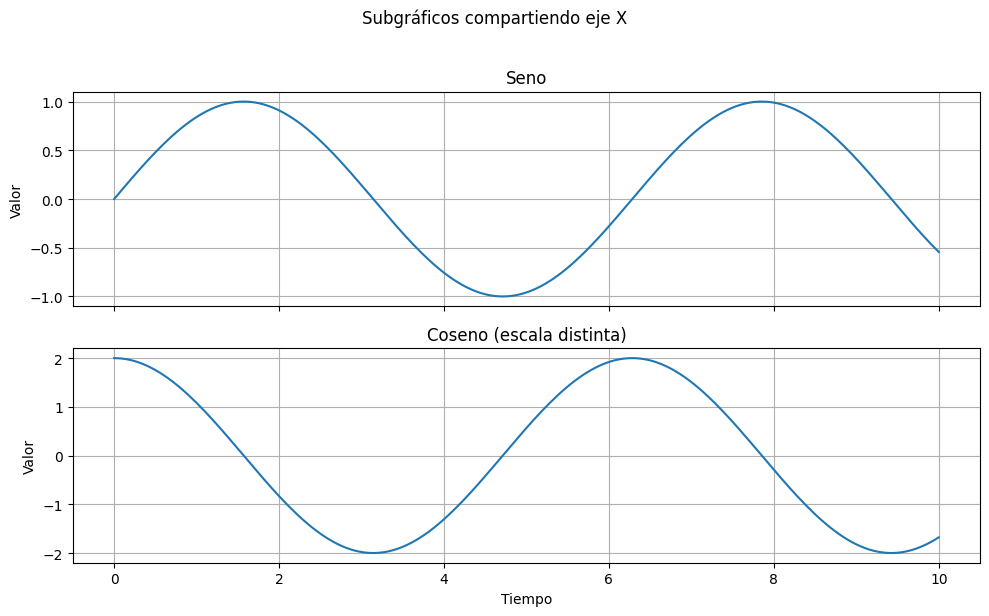

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
x = np.linspace(0, 10, 200)
y1 = np.sin(x)
y2 = 2*np.cos(x)  # distinta escala para que se note que NO comparten Y

# Subplots compartiendo eje X
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# Arriba: seno
axs[0].plot(x, y1)
axs[0].set_title("Seno")
axs[0].set_ylabel("Valor")
axs[0].grid(True)

# Abajo: coseno (escala distinta)
axs[1].plot(x, y2)
axs[1].set_title("Coseno (escala distinta)")
axs[1].set_xlabel("Tiempo")
axs[1].set_ylabel("Valor")
axs[1].grid(True)

# Detalle útil cuando sharex=True: no repetir etiquetas X arriba
axs[0].label_outer()

fig.suptitle("Subgráficos compartiendo eje X", y=1.02)
fig.tight_layout()
plt.show()


## Posición y tamaño de los gráficos

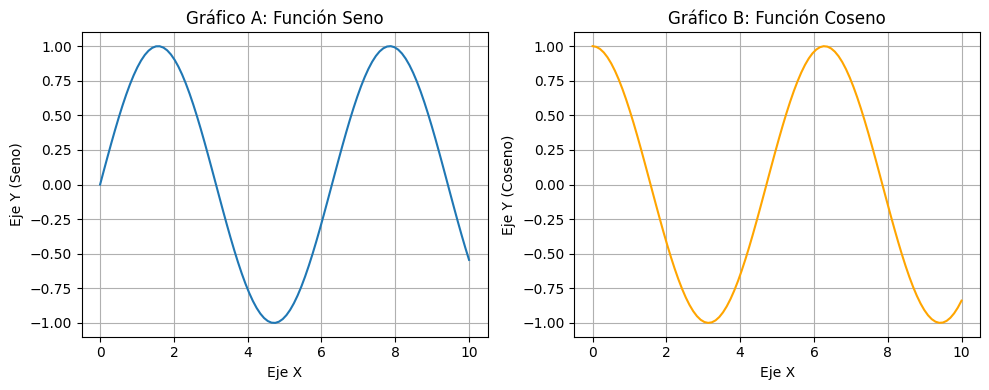

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
x = np.linspace(0, 10, 100)
y = np.sin(x)
y2 = np.cos(x)

# Tamaño de la figura definido con figsize
fig, axs = plt.subplots(1, 2, figsize=(10, 4)) # Define tamaño y legibilidad

# Gráfico A: Seno
axs[0].plot(x, y)
axs[0].set_title("Gráfico A: Función Seno")
axs[0].set_xlabel("Eje X")
axs[0].set_ylabel("Eje Y (Seno)")
axs[0].grid(True)

# Gráfico B: Coseno
axs[1].plot(x, y2, color="orange")
axs[1].set_title("Gráfico B: Función Coseno")
axs[1].set_xlabel("Eje X")
axs[1].set_ylabel("Eje Y (Coseno)")
axs[1].grid(True)

# Ajuste automático del espacio entre subgráficos
fig.tight_layout() # Evita superposición de títulos y etiquetas

plt.show()


## Colores, marcadores y estilos

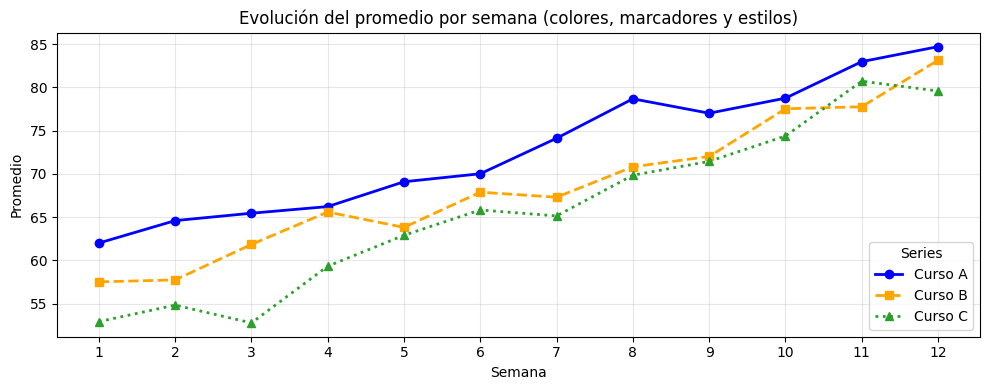

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Datos simulados (3 series)
x = np.arange(1, 13)  # semanas 1..12
rng = np.random.default_rng(7)

y_a = 60 + 2.0*x + rng.normal(0, 2, size=len(x))  # Curso A
y_b = 55 + 2.3*x + rng.normal(0, 2, size=len(x))  # Curso B
y_c = 50 + 2.6*x + rng.normal(0, 2, size=len(x))  # Curso C

fig, ax = plt.subplots(figsize=(10, 4))

# 1) COLORES + 2) MARCADORES + 3) ESTILOS DE LÍNEA
ax.plot(x, y_a, color="blue",      marker="o", linestyle="-",  linewidth=2, label="Curso A")
ax.plot(x, y_b, color="orange",    marker="s", linestyle="--", linewidth=2, label="Curso B")
ax.plot(x, y_c, color="#2ca02c",   marker="^", linestyle=":",  linewidth=2, label="Curso C")

# Detalles de lectura
ax.set_title("Evolución del promedio por semana (colores, marcadores y estilos)")
ax.set_xlabel("Semana")
ax.set_ylabel("Promedio")
ax.set_xticks(x)
ax.grid(True, alpha=0.3)
ax.legend(title="Series", loc="lower right")

plt.tight_layout()
plt.show()


Básicos marker:

"o" círculo

"." punto

"s" cuadrado

"^" triángulo arriba

"v" triángulo abajo

"<" triángulo izquierda

">" triángulo derecha

"D" diamante

"x" cruz

"+" más

"*" estrella

"p" pentágono

"h" hexágono

"1", "2", "3", "4" triángulos tipo “tick” (se ven como patitas)

## Ticks, etiquetas y leyendas

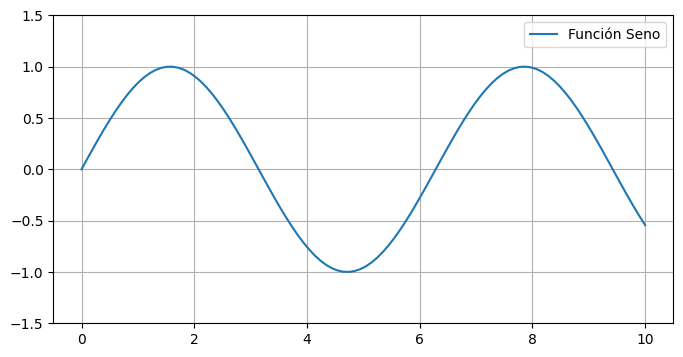

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
x = np.linspace(0, 10, 100)   # 100 puntos entre 0 y 10
y = np.sin(x)                 # seno de x

# Enfoque orientado a objetos (OO)
fig, ax = plt.subplots(figsize=(8, 4))  # Figure y Axes

ax.plot(x, y)
# Ticks
ax.set_xticks([0, 2, 4, 6, 8, 10])      # <--- Eje X
ax.set_yticks(np.arange(-1.5, 2, 0.5))  # <--- Eje Y

if ax.get_lines():
    ax.get_lines()[0].set_label('Función Seno')

ax.legend()
ax.grid(True)

# Mostrar el gráfico actualizado con la leyenda
plt.show()

## Fijando los límites de un gráfico

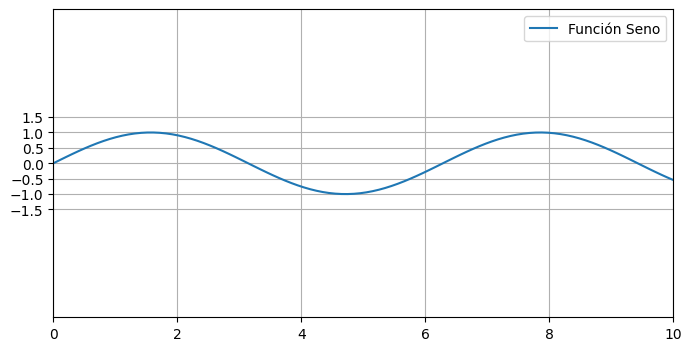

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
x = np.linspace(0, 10, 100)   # 100 puntos entre 0 y 10
y = np.sin(x)                 # seno de x

fig, ax = plt.subplots(figsize=(8, 4))  # Figure y Axes

ax.plot(x, y)
ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_yticks(np.arange(-1.5, 2, 0.5))

if ax.get_lines():
    ax.get_lines()[0].set_label('Función Seno')

# Límites del gráfico
ax.set_xlim(0, 10)
ax.set_ylim(-5, 5)

ax.legend()
ax.grid(True)

# Mostrar el gráfico actualizado con la leyenda
plt.show()

## Anotaciones y dibujos en un gráfico

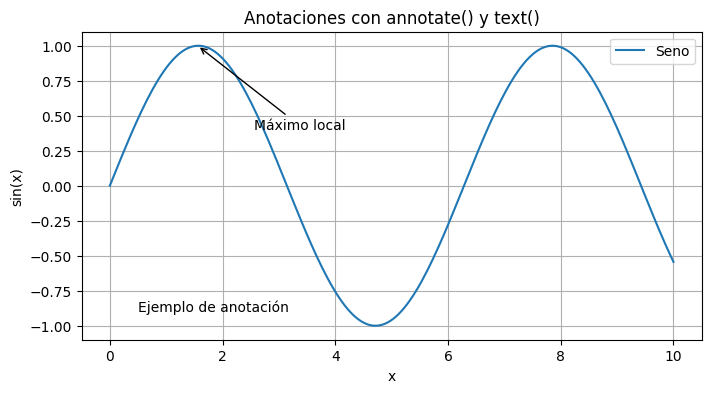

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 200)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y, label="Seno")
ax.grid(True)

# Punto a destacar: máximo
i_max = np.argmax(y)                # La función np.argmax(y) devuelve el índice (posición) del valor máximo en el array y
                                    # Si hay más de un valor máximo, np.argmax() devuelve solo el índice del primer máximo que encuentra.
x_max, y_max = x[i_max], y[i_max]

# Anotación con flecha
ax.annotate(
    "Máximo local",
    xy=(x_max, y_max),                  # punto objetivo
    xytext=(x_max + 1.0, y_max - 0.6),  # posición del texto
    arrowprops=dict(arrowstyle="->"),
)

# Texto libre (sin flecha)
ax.text(0.5, -0.9, "Ejemplo de anotación", fontsize=10)

ax.set_title("Anotaciones con annotate() y text()")
ax.set_xlabel("x")
ax.set_ylabel("sin(x)")
ax.legend()

plt.show()


xy = aquí apunto

xytext = aquí escribo

arrowprops = cómo se ve la flecha

Propiedades comunes de arrowprops:

* facecolor: color de la flecha
* edgecolor: color del borde
* arrowstyle: estilo ('->', '-[', '-|>', 'fancy', etc.)
* connectionstyle: curvatura ('arc3,rad=0.3')
* width: ancho de la línea
* headwidth: ancho de la punta

## Guardando los gráficos en un archivo

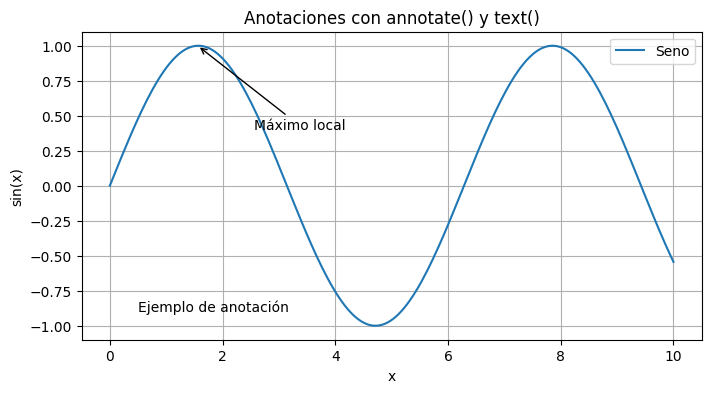

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 200)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y, label="Seno")
ax.grid(True)

# Punto a destacar: máximo
i_max = np.argmax(y)
x_max, y_max = x[i_max], y[i_max]

# Anotación con flecha
ax.annotate(
    "Máximo local",
    xy=(x_max, y_max),                  # punto objetivo
    xytext=(x_max + 1.0, y_max - 0.6),  # posición del texto
    arrowprops=dict(arrowstyle="->"),
)

# Texto libre (sin flecha)
ax.text(0.5, -0.9, "Ejemplo de anotación", fontsize=10)

ax.set_title("Anotaciones con annotate() y text()")
ax.set_xlabel("x")
ax.set_ylabel("sin(x)")
ax.legend()

fig.savefig("grafico.png", dpi=300, bbox_inches="tight") # dpi : puntos por pulgada (resolución) , bbox_inches : tight (Ajusta automáticamente el recorte al contenido real)
plt.show()


## Diagrama de línea

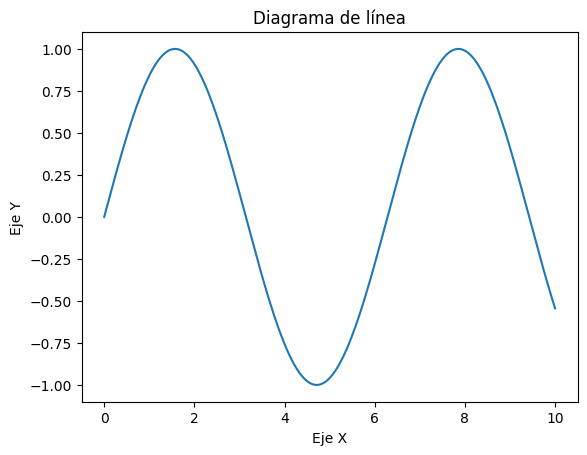

In [ ]:
plt.plot(x, y)
plt.title('Diagrama de línea')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()


## Histograma

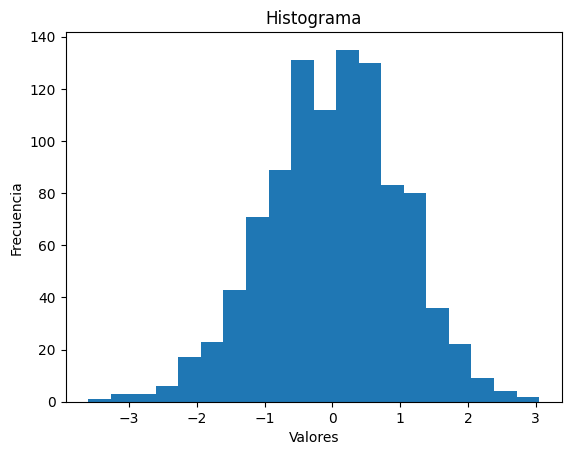

In [ ]:
import numpy as np

# Generar datos de ejemplo para el histograma
data = np.random.randn(1000)  # Genera 1000 números aleatorios de una distribución normal

plt.hist(data, bins=20)
plt.title('Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

## Boxplot

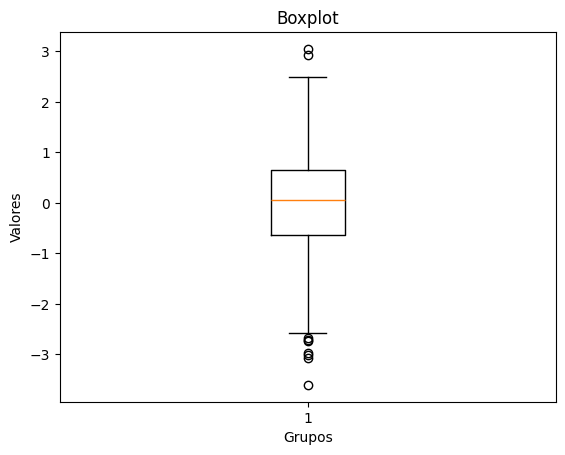

In [ ]:
plt.boxplot(data)
plt.title('Boxplot')
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.show()


## Diagrama de dispersión

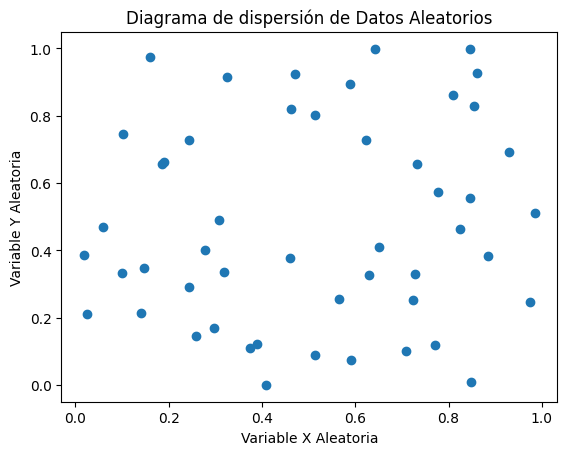

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos aleatorios para el diagrama de dispersión
x_scatter = np.random.rand(50)
y_scatter = np.random.rand(50)

plt.scatter(x_scatter, y_scatter)
plt.title('Diagrama de dispersión de Datos Aleatorios')
plt.xlabel('Variable X Aleatoria')
plt.ylabel('Variable Y Aleatoria')
plt.show()

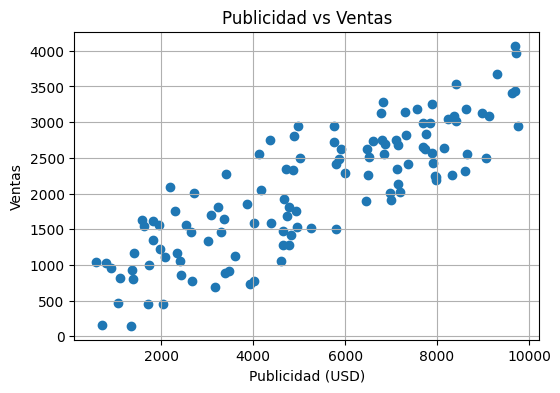

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
n = 120

publicidad_usd = rng.uniform(500, 10_000, size=n)
visitas_web = rng.uniform(1_000, 20_000, size=n)

# Variable extra: "competencia" (0 = baja, 1 = alta)
competencia = rng.integers(0, 2, size=n)

# Ventas (relación lineal + ruido)
ruido = rng.normal(0, 200, size=n)
ventas = 0.28 * publicidad_usd + 0.07 * visitas_web - 300 * competencia + ruido

df = pd.DataFrame({
    "publicidad_usd": publicidad_usd,
    "visitas_web": visitas_web,
    "competencia": competencia,
    "ventas": ventas
})

plt.figure(figsize=(6,4))
plt.scatter(data=df, x="publicidad_usd", y="ventas") # Usando plt.scatter directamente
plt.title("Publicidad vs Ventas")
plt.xlabel("Publicidad (USD)") # Añadiendo etiquetas de eje para mayor claridad
plt.ylabel("Ventas")
plt.grid(True)
plt.show()

## Diagrama de barras

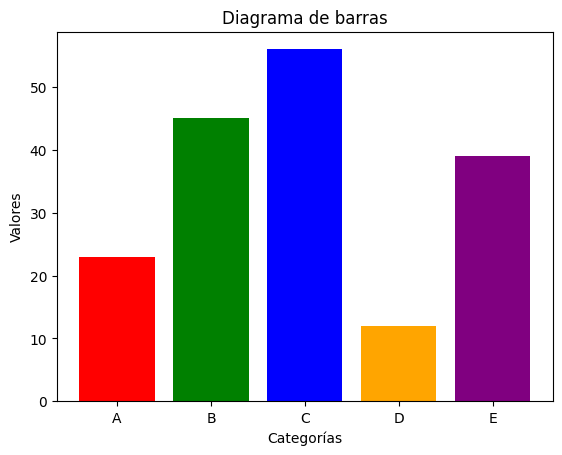

In [79]:
import matplotlib.pyplot as plt

# Datos de ejemplo para el diagrama de barras
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 56, 12, 39]
colors = ['red', 'green', 'blue', 'orange', 'purple']

plt.bar(categories, values, color=colors)

plt.title('Diagrama de barras')
plt.xlabel('Categorías')
plt.ylabel('Valores')
plt.show()

## Diagrama de torta

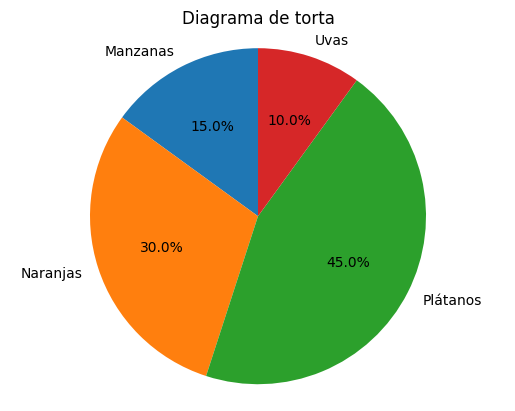

In [ ]:
import matplotlib.pyplot as plt

# Datos de ejemplo para el diagrama de torta
sizes = [15, 30, 45, 10]  # Porcentajes o valores relativos
labels = ['Manzanas', 'Naranjas', 'Plátanos', 'Uvas'] # Etiquetas para cada sección

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) # autopct para mostrar porcentajes
plt.title('Diagrama de torta')
plt.axis('equal') # Asegura que el círculo sea proporcional
plt.show()

**autopct='%1.1f%%'**

Controla el formato de los porcentajes que se muestran en cada porción del pastel.

Desglose:

* % = Indica que es un formato de cadena

* 1.1f = Formato numérico
     * 1 = mínimo 1 dígito antes del punto decimal
     * .1 = 1 dígito después del punto decimal
     * f = formato de punto flotante

* %% = Muestra el símbolo de porcentaje literal

**startangle=90**

Controla el ángulo inicial desde donde empieza a dibujarse el primer segmento del pastel (en grados, sentido antihorario).

Por defecto:

startangle=0 → Empieza en la posición de las 3 en punto (derecha)

Con startangle=90:

Empieza en la posición de las 12 en punto (arriba)

## Personalización avanzada de gráficos

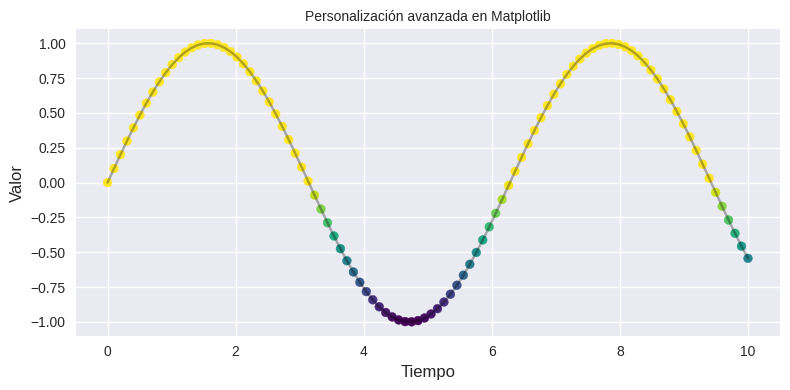

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 1 Estilo predefinido
plt.style.use("seaborn-v0_8") # Define colores base, grillas, fondos

# 2 Personalización de fuentes
plt.rcParams.update({
    "font.size": 11,
    "axes.titlesize": 14,
    "axes.labelsize": 12
})

# Datos simulados
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 3 Paleta de colores (colormap)
colors = plt.cm.viridis(y + 1)

fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x, y, c=colors, s=40)
ax.plot(x, y, color="black", alpha=0.3)

ax.set_title("Personalización avanzada en Matplotlib")
ax.set_xlabel("Tiempo")
ax.set_ylabel("Valor")

ax.grid(True)
fig.tight_layout()

plt.show()


## Gráficos 3D con Matplotlib

* from mpl_toolkits.mplot3d import Axes3D
    * mpl_toolkits: Conjunto de herramientas adicionales de matplotlib
    * mplot3d: Módulo específico para gráficos tridimensionales
    * Axes3D: Clase que permite crear ejes 3D

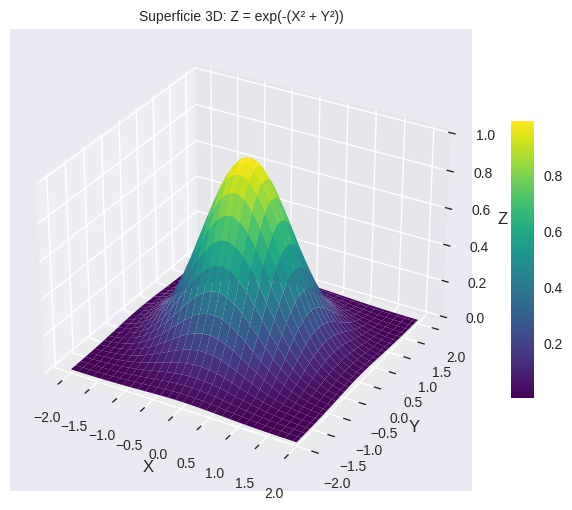

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Import necesario para habilitar 3D (mplot3d)
from mpl_toolkits.mplot3d import Axes3D  # (aunque no se use directamente, activa proyección 3D)

# 1) Crear una grilla (X, Y)
x = np.linspace(-2, 2, 60)
y = np.linspace(-2, 2, 60)
X, Y = np.meshgrid(x, y)

# 2) Definir una superficie (Z)
Z = np.exp(-(X**2 + Y**2))  # "campana" suave

# 3) Crear figura y eje 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d") # “figura con una grilla 1×1 y un único subplot que ocupa todo el espacio”

# 4) Graficar superficie
surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True) # linewidth=0 Controla el grosor de las líneas de la malla
                                                                               # antialiased=True Suaviza bordes para que no se vean “dientes de sierra”

# 5) Etiquetas y título
ax.set_title("Superficie 3D: Z = exp(-(X² + Y²))")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# 6) Barra de color (opcional, aporta harto)
fig.colorbar(surf, ax=ax, shrink=0.6, aspect=12)

plt.show()


## Gráficos interactivos

* ipywidgets es una librería para crear controles interactivos (widgets) en notebooks,

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Datos base
x = np.linspace(0, 8*np.pi, 400)

# Controles (widgets)
amp = widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description="Amplitud")
freq = widgets.FloatSlider(value=1.0, min=0.5, max=5.0, step=0.1, description="Frecuencia")
color = widgets.Dropdown(options=["blue", "orange", "green", "purple", "black"],
                         value="blue", description="Color")
btn = widgets.Button(description="Update")

out = widgets.Output()

def draw_plot(a, f, c):
    y = a * np.sin(f * x)
    plt.figure(figsize=(7, 3))
    plt.plot(x, y, color=c, label=f"A={a:.1f}, f={f:.1f}")
    plt.title("Interactive Matplotlib Plot")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()

def on_update(_):
    with out:
        clear_output(wait=True)
        draw_plot(amp.value, freq.value, color.value)

btn.on_click(on_update)

# Mostrar UI
display(widgets.VBox([amp, freq, color, btn, out]))

# Dibujo inicial
on_update(None)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

rng = np.random.default_rng(42)

# Widgets
n = widgets.IntSlider(value=120, min=30, max=500, step=10, description="Puntos")
noise = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description="Ruido")
size = widgets.IntSlider(value=30, min=5, max=120, step=5, description="Tamaño")
show_line = widgets.Checkbox(value=True, description="Mostrar tendencia")
btn = widgets.Button(description="Generar")
out = widgets.Output()

def draw_scatter(n_points, sigma, marker_size, trend):
    x = rng.uniform(0, 10, n_points)
    y = 2.5 * x + rng.normal(0, sigma, n_points)

    plt.figure(figsize=(7, 4))
    plt.scatter(x, y, s=marker_size, alpha=0.8)

    if trend:
        m, b = np.polyfit(x, y, 1)
        xx = np.linspace(0, 10, 200)
        plt.plot(xx, m*xx + b, linewidth=2)

    plt.title("Scatter interactivo: ruido vs tendencia")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

def on_click(_):
    with out:
        clear_output(wait=True)
        draw_scatter(n.value, noise.value, size.value, show_line.value)

btn.on_click(on_click)

display(widgets.VBox([n, noise, size, show_line, btn, out]))
on_click(None)


## **EJERCICIO 1**

1. Cree listas de edades (18 a 30) y promedios (1 a 10).

In [89]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
n = 60

edades = rng.integers(18, 31, size=n)  # 18 a 30 inclusive

# Promedios 1 a 10
promedios = 6 + 0.05*(edades - 18) + rng.normal(0, 1.2, size=n)
promedios = np.clip(promedios, 1, 10)

# Materias cursadas
materias = rng.integers(3, 8, size=n)


2. Use plt.hist() y plt.boxplot() para representar ambas variables.

3. Añade etiquetas, títulos y colores personalizados.

4. Muestre los gráficos en subplots.

5. Guarde el gráfico en formato PNG.

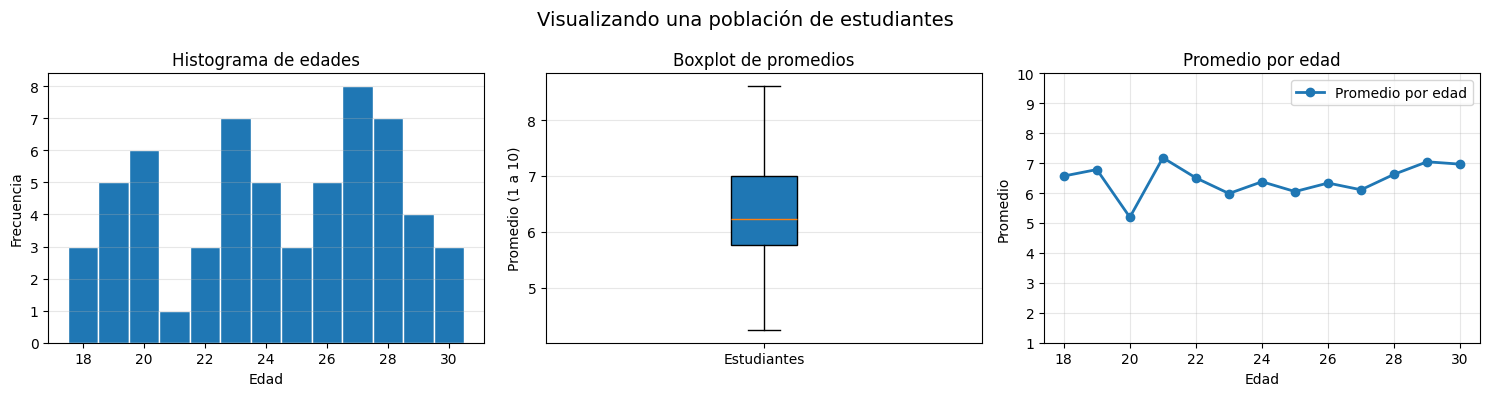

In [90]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# (a) Histograma de edades
axs[0].hist(edades, bins=np.arange(17.5, 31.5, 1), edgecolor="white")
axs[0].set_title("Histograma de edades")
axs[0].set_xlabel("Edad")
axs[0].set_ylabel("Frecuencia")
axs[0].set_xticks(range(18, 31, 2))
axs[0].grid(True, axis="y", alpha=0.3)

# (b) Boxplot de promedios
axs[1].boxplot(promedios, vert=True, patch_artist=True)
axs[1].set_title("Boxplot de promedios")
axs[1].set_ylabel("Promedio (1 a 10)")
axs[1].set_xticks([1])
axs[1].set_xticklabels(["Estudiantes"])
axs[1].grid(True, axis="y", alpha=0.3)

# (c) Evolución del promedio por edad (promedio agrupado)

# 2) Preparar serie "promedio por edad" para el gráfico línea
edades_unicas = np.sort(np.unique(edades))
prom_por_edad = np.array([promedios[edades == e].mean() for e in edades_unicas])

axs[2].plot(edades_unicas, prom_por_edad, marker="o", linewidth=2, label="Promedio por edad")
axs[2].set_title("Promedio por edad")
axs[2].set_xlabel("Edad")
axs[2].set_ylabel("Promedio")
axs[2].set_ylim(1, 10)
axs[2].grid(True, alpha=0.3)
axs[2].legend()

fig.suptitle("Visualizando una población de estudiantes", fontsize=14)
fig.tight_layout()

# Guardar en PNG (antes de show)
fig.savefig("poblacion_estudiantes.png", dpi=200, bbox_inches="tight")

plt.show()


## **PARTE 2**

## Animaciones con Matplotlib

* FuncAnimation es una herramienta de Matplotlib para crear animaciones a partir de un gráfico, actualizándolo cuadro a cuadro.

Defines una función que, para cada “frame”, cambia algo del gráfico, y FuncAnimation se encarga de:
* llamar esa función muchas veces
* redibujar la figura,

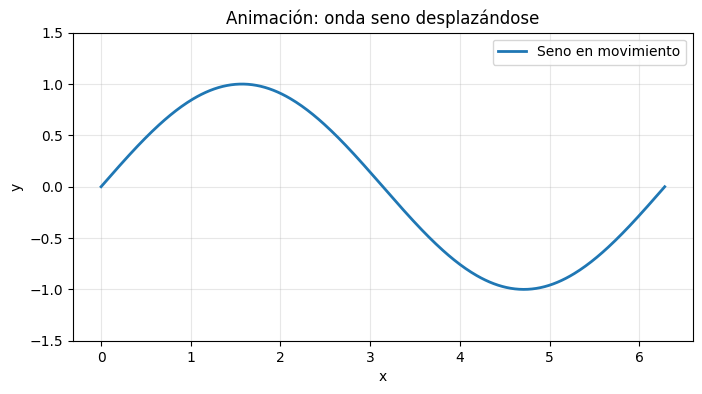

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Datos base
x = np.linspace(0, 2*np.pi, 400)

fig, ax = plt.subplots(figsize=(8, 4))
(line,) = ax.plot(x, np.sin(x), lw=2, label="Seno en movimiento")

ax.set_title("Animación: onda seno desplazándose")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_ylim(-1.5, 1.5)
ax.grid(True, alpha=0.3)
ax.legend()

# Función que actualiza cada frame
def update(frame):
    phase = frame * 0.1
    y = np.sin(x + phase)
    line.set_ydata(y)
    return (line,)

anim = FuncAnimation(
    fig,
    update,
    frames=100,      # cantidad de frames
    interval=50,     # ms entre frames
    blit=True
)

plt.show()


In [ ]:
# Guardar como GIF (requiere pillow)
anim.save("seno_animado.gif", writer="pillow", fps=20)

# Guardar como MP4 (requiere ffmpeg instalado)
# anim.save("seno_animado.mp4", writer="ffmpeg", fps=20)


## Mapas de calor

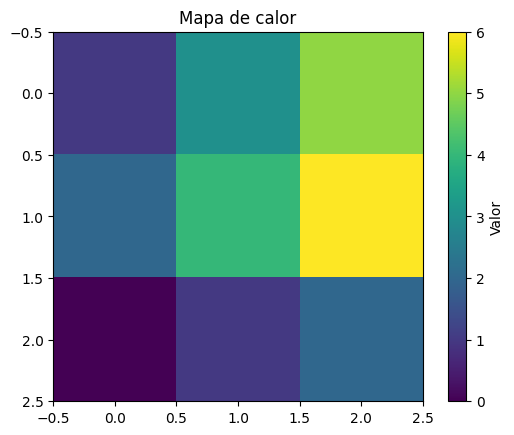

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
Z = np.array([
    [1, 3, 5],
    [2, 4, 6],
    [0, 1, 2]
])

# Crear mapa de calor
plt.imshow(Z, cmap='viridis')
plt.colorbar(label='Valor')
plt.title('Mapa de calor')
plt.show()





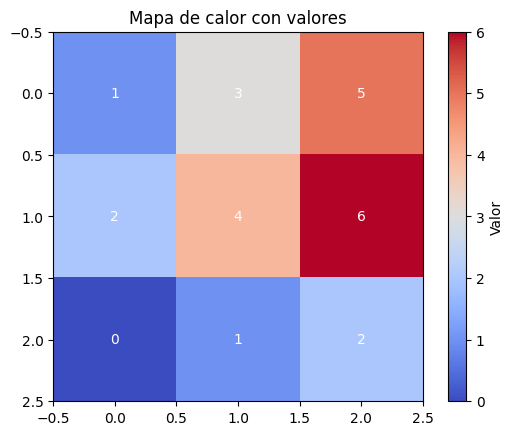

In [93]:
import numpy as np
import matplotlib.pyplot as plt

Z = np.array([
    [1, 3, 5],
    [2, 4, 6],
    [0, 1, 2]
])

plt.imshow(Z, cmap='coolwarm')
plt.colorbar(label='Valor')

# Mostrar valores en cada celda
for i in range(len(Z)):
    for j in range(len(Z[0])):
        plt.text(j, i, Z[i, j], ha='center', va='center', color='white')

plt.title('Mapa de calor con valores')
plt.show()

## Gráficos de contorno

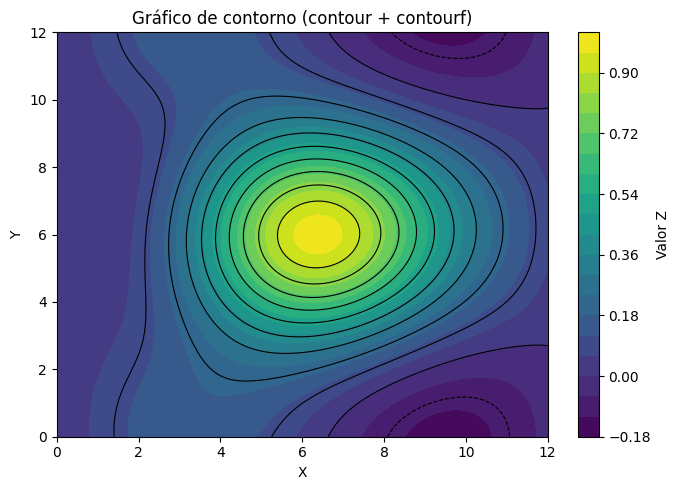

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Grilla (X, Y)
x = np.linspace(0, 12, 200)
y = np.linspace(0, 12, 200)
X, Y = np.meshgrid(x, y)

# 2) Función 2D tipo "montañita" (gaussiana) + una ondulación suave
Z = np.exp(-((X - 6)**2 + (Y - 6)**2) / 10) + 0.15*np.sin(X/2) * np.cos(Y/2)


plt.style.use('default')

# 3) Gráfico de contorno
fig, ax = plt.subplots(figsize=(7, 5))

# Relleno
cf = ax.contourf(X, Y, Z, levels=20)
# Líneas
c = ax.contour(X, Y, Z, levels=12, colors="black", linewidths=0.8)

ax.set_title("Gráfico de contorno (contour + contourf)")
ax.set_xlabel("X")
ax.set_ylabel("Y")

# Barra de color
plt.colorbar(cf, ax=ax, label="Valor Z")
plt.grid(False)
plt.tight_layout()
plt.show()


## Personalización del grid

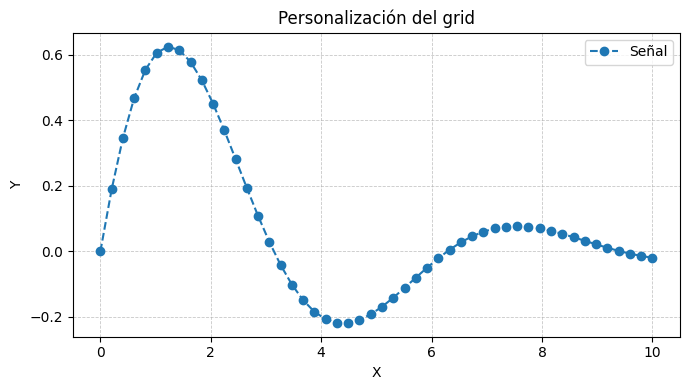

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.linspace(0, 10, 50)
y = np.exp(-x / 3) * np.sin(x)

fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(x, y, marker="o", linestyle="--", label="Señal")

# Personalización del grid
ax.grid(True, which="both",
        linestyle="--",
        linewidth=0.6,
        alpha=0.7)

ax.set_title("Personalización del grid")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()

plt.tight_layout()
plt.show()


El grid no es decoración: mejora la lectura de valores y patrones, especialmente en gráficos cuantitativos.

## Gráficos polares

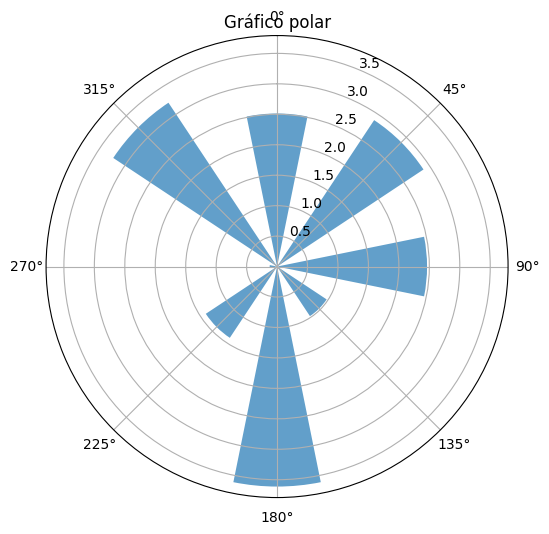

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Datos angulares
theta = np.linspace(0, 2 * np.pi, 8, endpoint=False)
r = np.random.rand(8) * 5

fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize=(6, 6))

ax.bar(theta, r, width=0.4, alpha=0.7)

ax.set_title("Gráfico polar")     # ax.set_title("Gráfico polar", pad=20)
ax.set_theta_zero_location("N")   # Norte arriba
ax.set_theta_direction(-1)        # Sentido horario

plt.show()


El sistema polar cambia la forma de pensar el eje X: ahora representa ángulos, no magnitudes lineales.

## Gráficos de violín

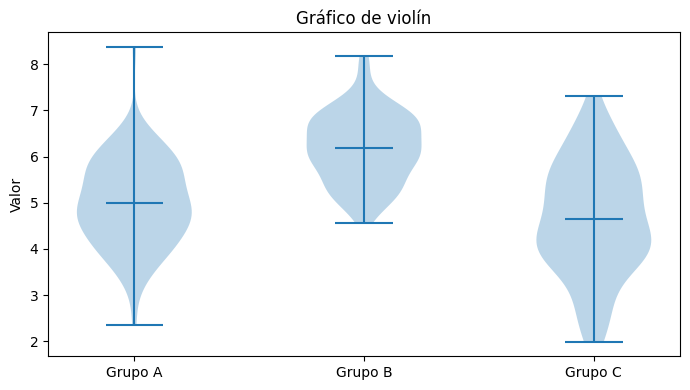

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos simulados
grupo_A = np.random.normal(5, 1, 100)
grupo_B = np.random.normal(6, 0.8, 100)
grupo_C = np.random.normal(4.5, 1.2, 100)

data = [grupo_A, grupo_B, grupo_C]

fig, ax = plt.subplots(figsize=(7, 4))

ax.violinplot(data, showmeans=True)

ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["Grupo A", "Grupo B", "Grupo C"])
ax.set_ylabel("Valor")
ax.set_title("Gráfico de violín")

plt.tight_layout()
plt.show()


El violin muestra la forma de la distribución, algo que ni el boxplot ni el promedio capturan bien.

## Gráficos de área apilada

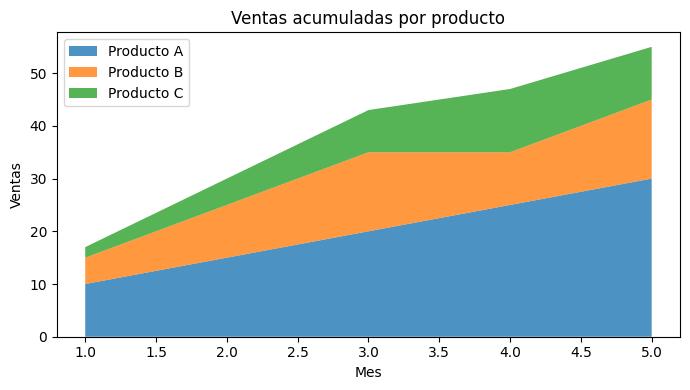

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.arange(1, 6)
ventas_A = [10, 15, 20, 25, 30]
ventas_B = [5, 10, 15, 10, 15]
ventas_C = [2, 5, 8, 12, 10]

fig, ax = plt.subplots(figsize=(7, 4))

ax.stackplot(
    x,
    ventas_A,
    ventas_B,
    ventas_C,
    labels=["Producto A", "Producto B", "Producto C"],
    alpha=0.8       # alpha controla la transparencia (opacidad) de los colores en el gráfico.
)

ax.set_title("Ventas acumuladas por producto")
ax.set_xlabel("Mes")
ax.set_ylabel("Ventas")
ax.legend(loc="upper left")

plt.tight_layout()
plt.show()


## Gráficos de radar

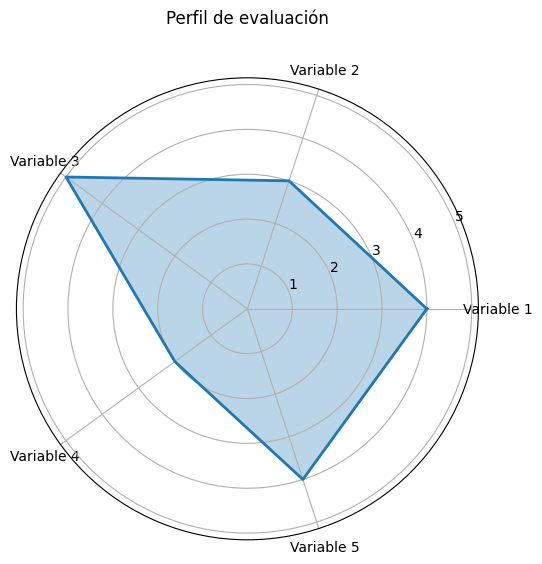

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Categorías
labels = ["Variable 1", "Variable 2", "Variable 3", "Variable 4", "Variable 5"]
values = [4, 3, 5, 2, 4]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
values += values[:1]
angles = np.concatenate([angles, angles[:1]])

fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(6, 6))

ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.3)

ax.set_thetagrids(angles[:-1] * 180 / np.pi, labels)
ax.set_title("Perfil de evaluación", y=1.1) # Mover más arriba

plt.show()


## Personalización de ejes secundarios

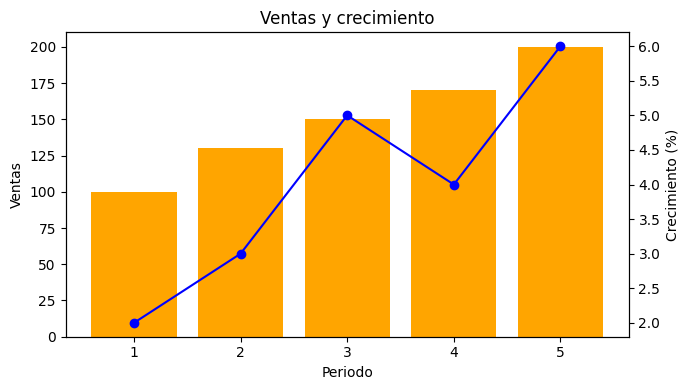

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.arange(1, 6)
ventas = [100, 130, 150, 170, 200]
crecimiento = [2, 3, 5, 4, 6]

fig, ax1 = plt.subplots(figsize=(7, 4))

ax1.bar(x, ventas, color="orange", label="Ventas")
ax1.set_ylabel("Ventas")

# Crea un segundo eje Y (eje gemelo) que comparte el mismo eje X con ax1.
ax2 = ax1.twinx()
ax2.plot(x, crecimiento, color="blue", marker="o", label="Crecimiento (%)")
ax2.set_ylabel("Crecimiento (%)")

ax1.set_xlabel("Periodo")
ax1.set_title("Ventas y crecimiento")

plt.tight_layout()
plt.show()


## Gráficos de burbujas

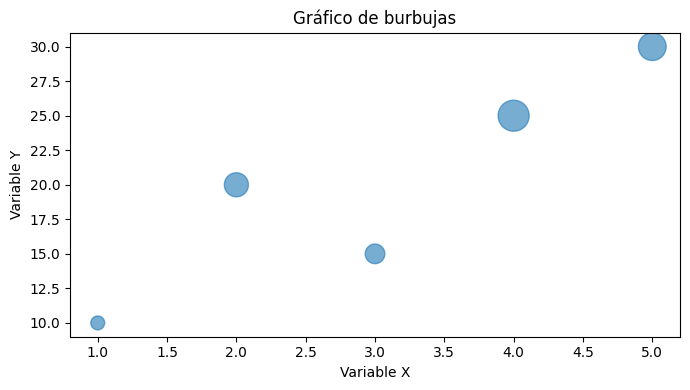

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = [1, 2, 3, 4, 5]
y = [10, 20, 15, 25, 30]
size = [100, 300, 200, 500, 400]


fig, ax = plt.subplots(figsize=(7, 4))

ax.scatter(x, y, s=size, alpha=0.6) # s (size): Tamaño de la burbuja (tercera dimensión)

ax.set_title("Gráfico de burbujas")
ax.set_xlabel("Variable X")
ax.set_ylabel("Variable Y")

plt.tight_layout()
plt.show()


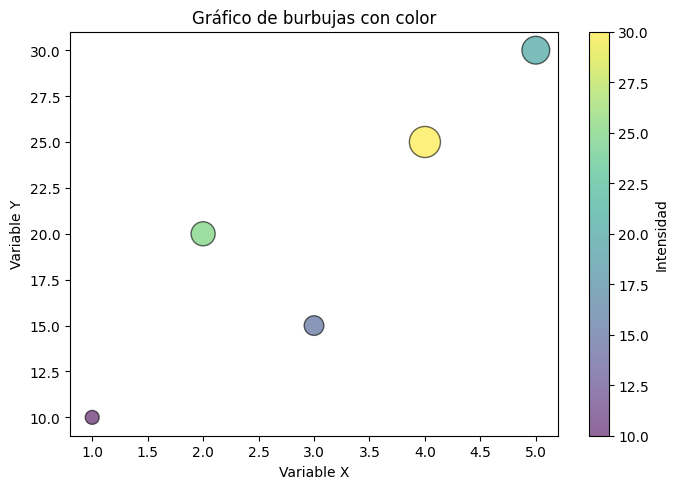

In [110]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 20, 15, 25, 30]
size = [100, 300, 200, 500, 400]
colors = [10, 25, 15, 30, 20]  # Cuarta variable

fig, ax = plt.subplots(figsize=(7, 5))

scatter = ax.scatter(x, y, s=size, c=colors, cmap='viridis', alpha=0.6, edgecolors='black')

plt.colorbar(scatter, label='Intensidad')
ax.set_title("Gráfico de burbujas con color")
ax.set_xlabel("Variable X")
ax.set_ylabel("Variable Y")

plt.tight_layout()
plt.show()

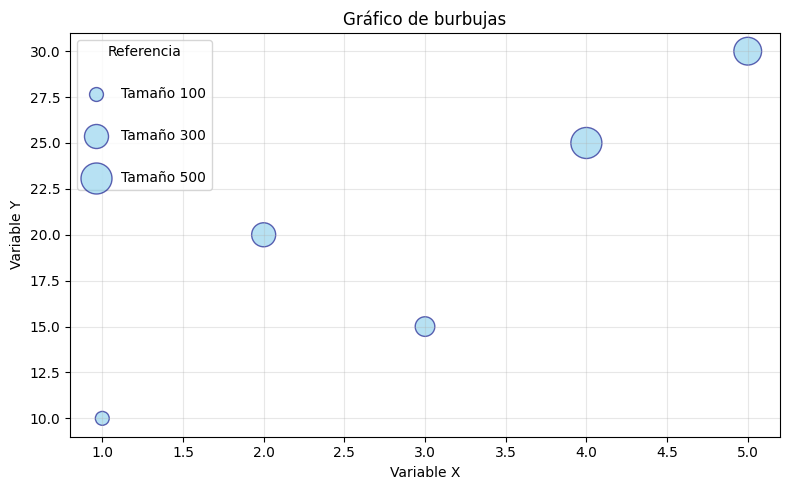

In [111]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 20, 15, 25, 30]
size = [100, 300, 200, 500, 400]

fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(x, y, s=size, alpha=0.6, color='skyblue', edgecolors='navy')

# Leyenda de referencia de tamaños
for area in [100, 300, 500]:
    ax.scatter([], [], s=area, c='skyblue', alpha=0.6,
               edgecolors='navy', label=f'Tamaño {area}')

ax.legend(scatterpoints=1, frameon=True, labelspacing=2, title='Referencia')
ax.set_title("Gráfico de burbujas")
ax.set_xlabel("Variable X")
ax.set_ylabel("Variable Y")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

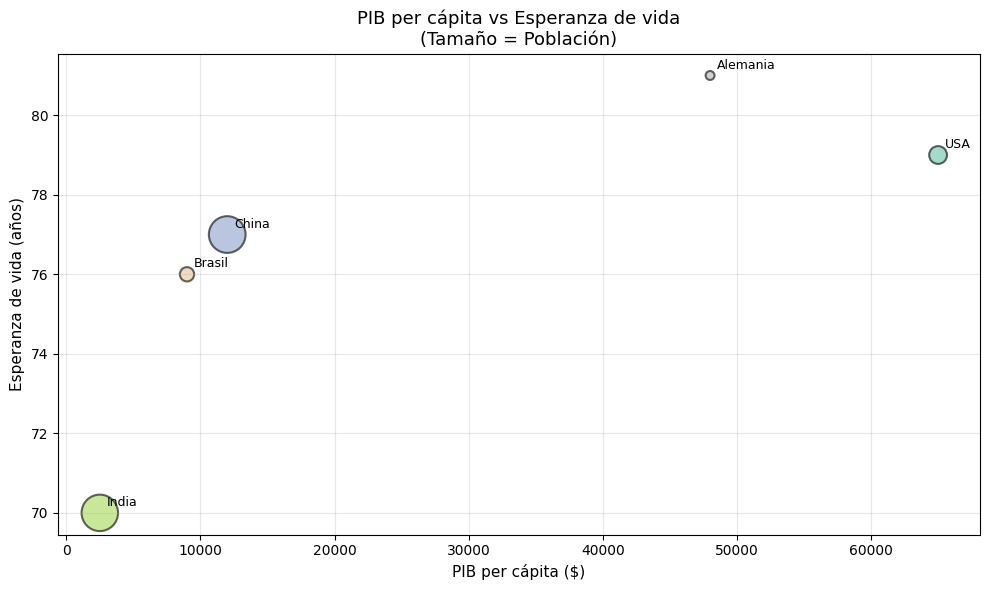

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de países (ejemplo)
paises = ['USA', 'China', 'India', 'Brasil', 'Alemania']
pib_per_capita = [65000, 12000, 2500, 9000, 48000]  # X
esperanza_vida = [79, 77, 70, 76, 81]                # Y
poblacion = [331, 1400, 1380, 213, 83]               # Tamaño (millones)

# Normalizar tamaño (población en millones → área de burbuja)
sizes = [p * 0.5 for p in poblacion]

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(pib_per_capita, esperanza_vida, s=sizes,
                     alpha=0.6, c=range(len(paises)), cmap='Set2',
                     edgecolors='black', linewidth=1.5)

# Etiquetas
for i, pais in enumerate(paises):
    ax.annotate(pais, (pib_per_capita[i], esperanza_vida[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

ax.set_title("PIB per cápita vs Esperanza de vida\n(Tamaño = Población)", fontsize=13)
ax.set_xlabel("PIB per cápita ($)", fontsize=11)
ax.set_ylabel("Esperanza de vida (años)", fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Gráficos de caja y bigotes agrupados

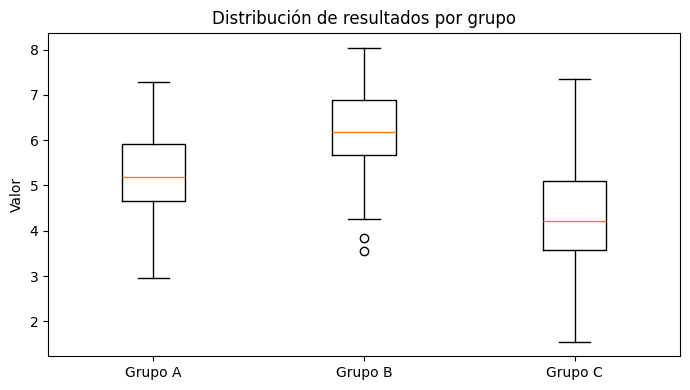

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
grupo_A = np.random.normal(5, 1, 50)
grupo_B = np.random.normal(6, 1, 50)
grupo_C = np.random.normal(4.5, 1.2, 50)

data = [grupo_A, grupo_B, grupo_C]

fig, ax = plt.subplots(figsize=(7, 4))

ax.boxplot(data, tick_labels=["Grupo A", "Grupo B", "Grupo C"])

ax.set_title("Distribución de resultados por grupo")
ax.set_ylabel("Valor")

plt.tight_layout()
plt.show()


## Gráficos de barras apiladas

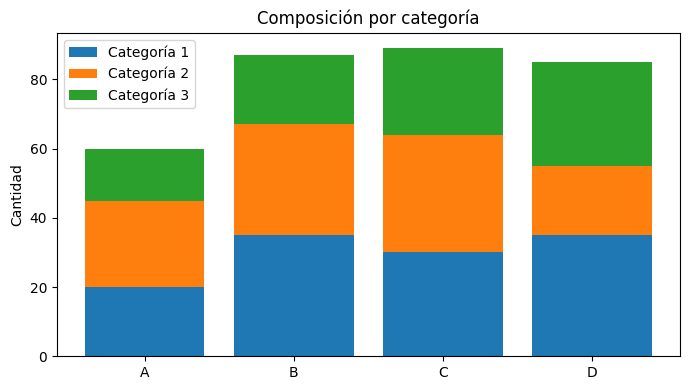

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
categorias = ["A", "B", "C", "D"]
cat1 = [20, 35, 30, 35]
cat2 = [25, 32, 34, 20]
cat3 = [15, 20, 25, 30]

x = np.arange(len(categorias))

fig, ax = plt.subplots(figsize=(7, 4))

ax.bar(x, cat1, label="Categoría 1")
ax.bar(x, cat2, bottom=cat1, label="Categoría 2")
ax.bar(x, cat3, bottom=np.array(cat1) + np.array(cat2), label="Categoría 3")

ax.set_xticks(x)
ax.set_xticklabels(categorias)
ax.set_ylabel("Cantidad")
ax.set_title("Composición por categoría")
ax.legend()

plt.tight_layout()
plt.show()


## Gráficos de barras horizontales

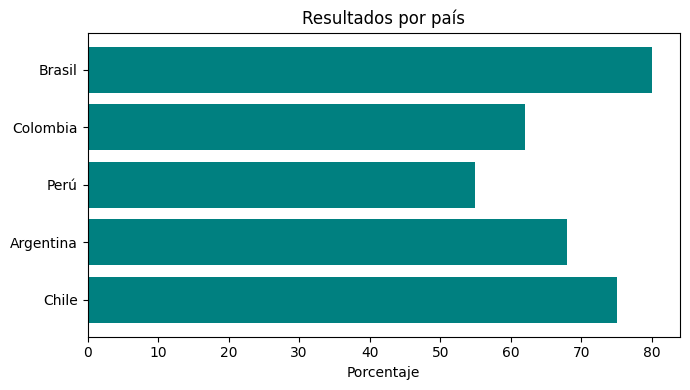

In [117]:
import matplotlib.pyplot as plt

# Datos
paises = ["Chile", "Argentina", "Perú", "Colombia", "Brasil"]
porcentaje = [75, 68, 55, 62, 80]

fig, ax = plt.subplots(figsize=(7, 4))

ax.barh(paises, porcentaje, color="teal")

ax.set_xlabel("Porcentaje")
ax.set_title("Resultados por país")

plt.tight_layout()
plt.show()


## Gráficos de densidad

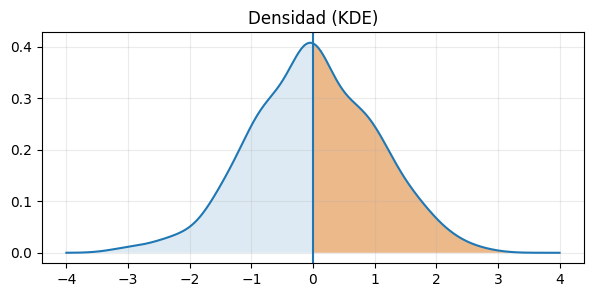

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

rng = np.random.default_rng(4)
z = rng.normal(0, 1, 500)

kde = gaussian_kde(z)
x = np.linspace(-4, 4, 400)
y = kde(x)

fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y)
ax.fill_between(x, 0, y, alpha=0.15)

mask = x >= 0
ax.fill_between(x[mask], 0, y[mask], alpha=0.45)
ax.axvline(0)

ax.set_title("Densidad (KDE)")
ax.grid(True, alpha=0.25)
plt.show()


## Gráficos de barras de error

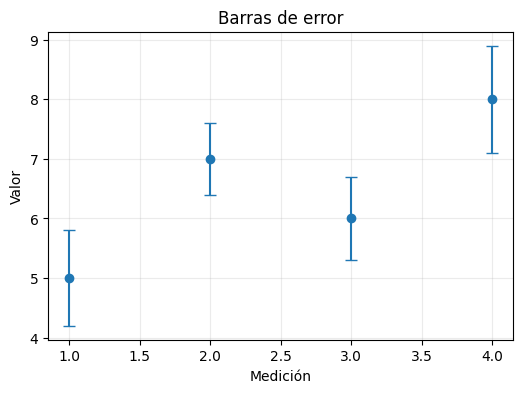

In [119]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4])
y = np.array([5, 7, 6, 8])
err = np.array([0.8, 0.6, 0.7, 0.9])

fig, ax = plt.subplots(figsize=(6, 4))
ax.errorbar(x, y, yerr=err, fmt="o", capsize=4)
ax.set_title("Barras de error")
ax.set_xlabel("Medición")
ax.set_ylabel("Valor")
ax.grid(True, alpha=0.25)
plt.show()


## Gráficos de velas japonesas

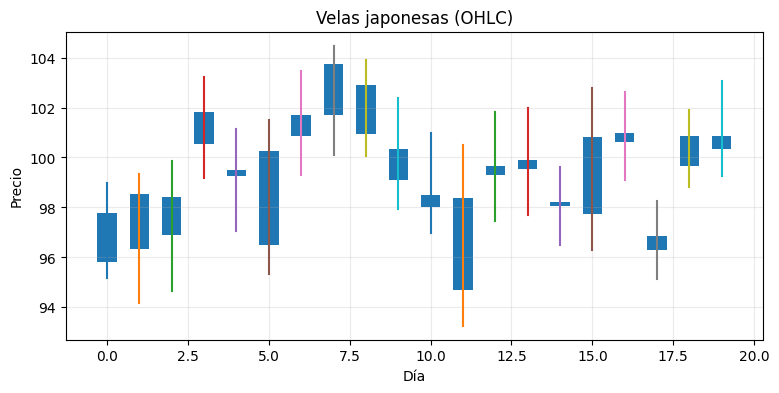

In [120]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(10)
n = 20
x = np.arange(n)

open_ = rng.normal(100, 2, n)
close = open_ + rng.normal(0, 2, n)
high = np.maximum(open_, close) + rng.uniform(0.5, 2.5, n)
low  = np.minimum(open_, close) - rng.uniform(0.5, 2.5, n)

fig, ax = plt.subplots(figsize=(9, 4))

for i in range(n):
    # mecha
    ax.plot([x[i], x[i]], [low[i], high[i]])
    # cuerpo
    bottom = min(open_[i], close[i])
    height = abs(close[i] - open_[i])
    ax.add_patch(plt.Rectangle((x[i]-0.3, bottom), 0.6, height))

ax.set_title("Velas japonesas (OHLC)")
ax.set_xlabel("Día")
ax.set_ylabel("Precio")
ax.grid(True, alpha=0.25)
plt.show()


## Gráficos de flujo (Sankey)

In [ ]:

import plotly.graph_objects as go

# -----------------------------
# 1) Nodos (izquierda y derecha)
# -----------------------------
left = ["Consumer", "Corporate", "Home Office"]
right = [
    "Accessories", "Appliances", "Art", "Binders", "Bookcases", "Chairs",
    "Copiers", "Envelopes", "Furnishings", "Machines", "Paper",
    "Phones", "Storage", "Supplies", "Tables"
]

labels = left + right

# Para ubicar visualmente (tipo columna izquierda vs derecha)
# (No es obligatorio, pero ayuda a que se parezca mucho más al ejemplo)
x = [0.02]*len(left) + [0.98]*len(right)
y_left  = [0.2, 0.5, 0.8]  # posiciones de los 3 segmentos
y_right = [i/(len(right)-1) for i in range(len(right))]  # distribuye categorías
y = y_left + y_right

# -----------------------------
# 2) Links (flujos)
# -----------------------------
# source: índice del nodo origen
# target: índice del nodo destino
# value : magnitud del flujo

source = []
target = []
value  = []
link_colors = []

# Colores por segmento (para parecerse a imagen 2)
seg_color = {
    "Consumer": "rgba(255,105,135,0.55)",     # rosado
    "Corporate": "rgba(155,89,182,0.55)",     # morado
    "Home Office": "rgba(241,196,15,0.55)",   # amarillo
}

# Valores ficticios (puedes reemplazar por tus datos reales)
flows = {
    "Consumer":   [18, 12,  7, 15,  9, 14,  6,  4, 10,  5, 11, 16,  8,  9, 13],
    "Corporate":  [10,  7,  3,  9,  6,  8,  4,  2,  7,  3,  6,  9,  5,  6,  8],
    "Home Office":[ 8,  5,  2,  6,  4,  5,  3,  1,  4,  2,  4,  6,  3,  4,  5],
}

for seg_i, seg in enumerate(left):
    for j, cat in enumerate(right):
        source.append(seg_i)                       # Consumer/Corporate/Home Office
        target.append(len(left) + j)               # categoría
        value.append(flows[seg][j])
        link_colors.append(seg_color[seg])

# -----------------------------
# 3) Figura
# -----------------------------
fig = go.Figure(data=[go.Sankey(
    arrangement="fixed",  # respeta tus x,y (si lo quieres bien “columna izquierda/derecha”)
    node=dict(
        pad=18,
        thickness=16,
        line=dict(color="rgba(0,0,0,0.2)", width=0.5),
        label=labels,
        x=x,
        y=y
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
)])

fig.update_layout(
    title="Sankey Chart",
    font=dict(size=12),
    height=600,
    margin=dict(l=40, r=40, t=60, b=20)
)

fig.show()


## Gráficos de proyección

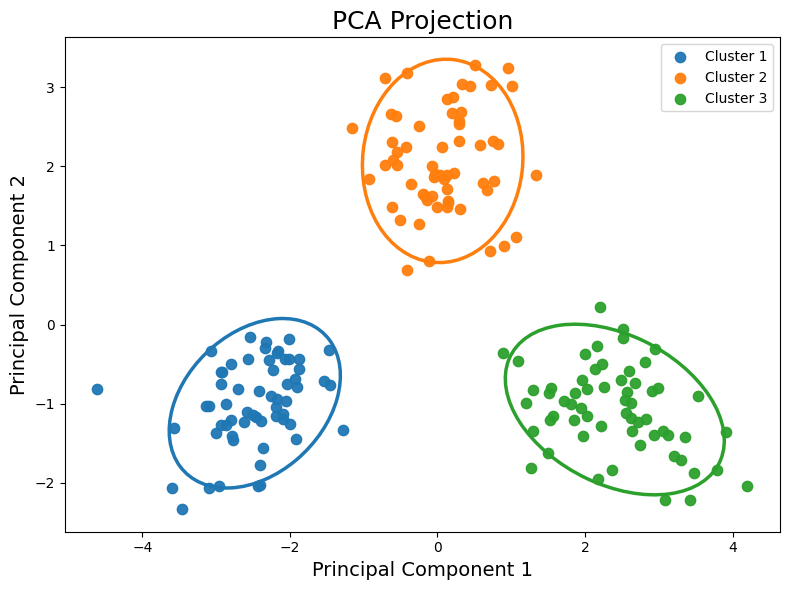

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# -----------------------------
# 1) Datos simulados (3 clusters bien separados)
# -----------------------------
rng = np.random.default_rng(42)

n = 60  # puntos por cluster
means = np.array([
    [-2.5,  0.0,  0.5],
    [ 0.8,  2.0, -0.2],
    [ 2.2, -1.5,  0.3],
])

covs = [
    np.array([[0.5, 0.1, 0.0],
              [0.1, 0.3, 0.0],
              [0.0, 0.0, 0.2]]),
    np.array([[0.3, 0.05, 0.0],
              [0.05, 0.4, 0.0],
              [0.0, 0.0, 0.2]]),
    np.array([[0.4, -0.08, 0.0],
              [-0.08, 0.35, 0.0],
              [0.0, 0.0, 0.2]]),
]

X_list = []
labels = []
for k in range(3):
    Xk = rng.multivariate_normal(means[k], covs[k], size=n)
    X_list.append(Xk)
    labels.extend([k] * n)

X = np.vstack(X_list)
labels = np.array(labels)

# Si ya tienes tus datos reales, reemplaza lo de arriba por:
# X = <tu matriz (n_muestras, n_features)>
# labels = <tus clusters (n_muestras,)>

# -----------------------------
# 2) PCA a 2 dimensiones
# -----------------------------
pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(X)

# -----------------------------
# 3) Función para dibujar elipse por cluster
# -----------------------------
def add_cov_ellipse(ax, data_2d, n_std=2.0, **kwargs):
    """
    Dibuja una elipse basada en la covarianza de data_2d (Nx2).
    n_std controla el tamaño (2.0 ~ cubre gran parte de los puntos).
    """
    x = data_2d[:, 0]
    y = data_2d[:, 1]
    cov = np.cov(x, y)

    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals = vals[order]
    vecs = vecs[:, order]

    angle = np.degrees(np.arctan2(vecs[1, 0], vecs[0, 0]))

    width, height = 2 * n_std * np.sqrt(vals)
    mean_x, mean_y = np.mean(x), np.mean(y)

    ell = Ellipse((mean_x, mean_y), width, height, angle=angle, **kwargs)
    ax.add_patch(ell)

# -----------------------------
# 4) Plot estilo "imagen 2"
# -----------------------------
fig, ax = plt.subplots(figsize=(8, 6))

colors = ["tab:blue", "tab:orange", "tab:green"]
names = ["Cluster 1", "Cluster 2", "Cluster 3"]

for k, (c, name) in enumerate(zip(colors, names)):
    pts = Z[labels == k]
    ax.scatter(pts[:, 0], pts[:, 1], s=55, label=name, alpha=0.95)
    add_cov_ellipse(
        ax,
        pts,
        n_std=2.0,
        edgecolor=c,
        facecolor="none",
        linewidth=2.5
    )

ax.set_title("PCA Projection", fontsize=18)
ax.set_xlabel("Principal Component 1", fontsize=14)
ax.set_ylabel("Principal Component 2", fontsize=14)

ax.legend(loc="upper right", frameon=True)
ax.grid(False)

plt.tight_layout()
plt.show()



## Gráficos de mapa

In [122]:
import geopandas as gpd

url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world = gpd.read_file(url)

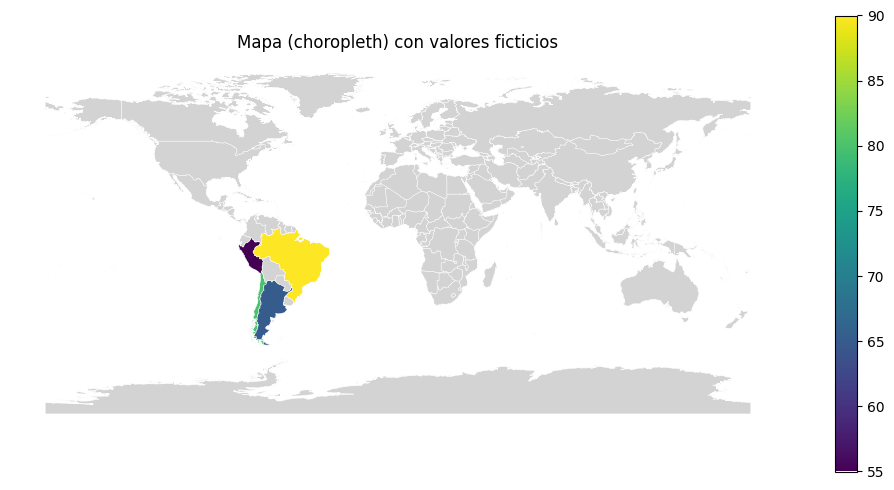

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    "iso3": ["CHL", "ARG", "PER", "BRA"],
    "valor": [80, 65, 55, 90]
})

gdf = world.merge(data, left_on="ISO3166-1-Alpha-3", right_on="iso3", how="left")

fig, ax = plt.subplots(figsize=(10, 5))
gdf.plot(
    column="valor",
    ax=ax,
    legend=True,
    missing_kwds={"color": "lightgrey", "label": "Sin dato"},
    edgecolor="white",
    linewidth=0.3
)

ax.set_title("Mapa (choropleth) con valores ficticios")
ax.set_axis_off()
plt.tight_layout()
plt.show()


## Gráficos de redes

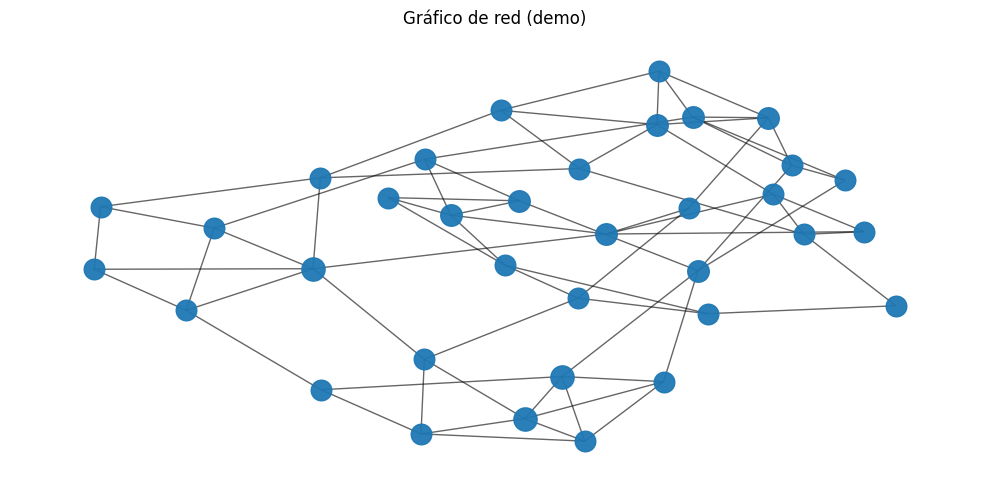

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Reproducibilidad
rng = np.random.default_rng(42)

# 1) Crear una red (tipo "mundo pequeño", bien parecida a la imagen)
G = nx.watts_strogatz_graph(n=35, k=4, p=0.15, seed=42)

# 2) Layout (posición de nodos)
pos = nx.spring_layout(G, seed=42)

# 3) Elegir nodos "destacados" según conectividad (grado)
grados = dict(G.degree())
top = sorted(grados, key=grados.get, reverse=True)

rojos = set(top[:3])          # 3 más conectados
verdes = set(top[3:10])       # siguientes 7
azules = set(G.nodes()) - rojos - verdes

# 4) Dibujar
plt.figure(figsize=(10, 5))

# Enlaces
nx.draw_networkx_edges(G, pos, alpha=0.6, width=1)

# Nodos por grupo (colores)
nx.draw_networkx_nodes(G, pos, nodelist=list(azules), node_size=220, alpha=0.95)
nx.draw_networkx_nodes(G, pos, nodelist=list(verdes), node_size=240, alpha=0.95)
nx.draw_networkx_nodes(G, pos, nodelist=list(rojos),  node_size=280, alpha=0.95)

# Un poco de estilo
plt.title("Gráfico de red (demo)")
plt.axis("off")
plt.tight_layout()
plt.show()


## Gráficos de streamplot

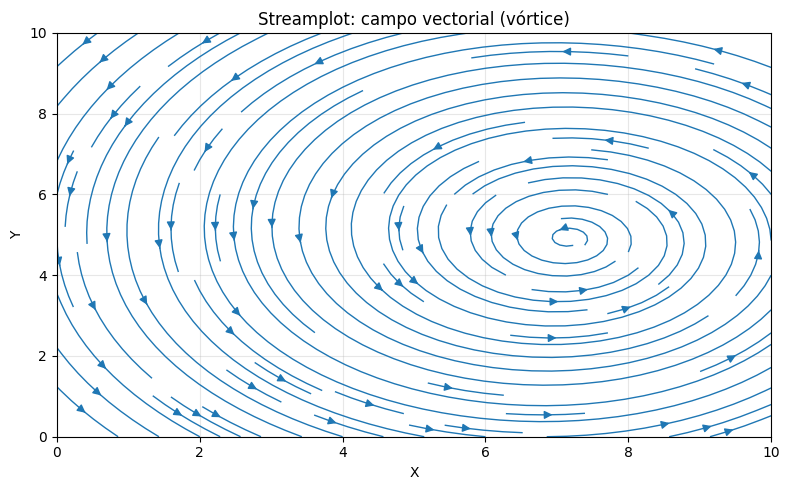

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Grilla
x = np.linspace(0, 10, 40)
y = np.linspace(0, 10, 40)
X, Y = np.meshgrid(x, y)

# 2) Campo vectorial (vórtice alrededor del punto (7, 5))
x0, y0 = 7, 5
U = -(Y - y0)   # componente en x
V =  (X - x0)   # componente en y

# (opcional) suavizar para que no sea tan "perfecto"
U = U + 0.2*np.sin(X/2)
V = V + 0.2*np.cos(Y/2)

# 3) Streamplot
plt.figure(figsize=(8, 5))
plt.streamplot(X, Y, U, V, density=1.2, linewidth=1, arrowsize=1.2)

plt.title("Streamplot: campo vectorial (vórtice)")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Gráficos de quiver

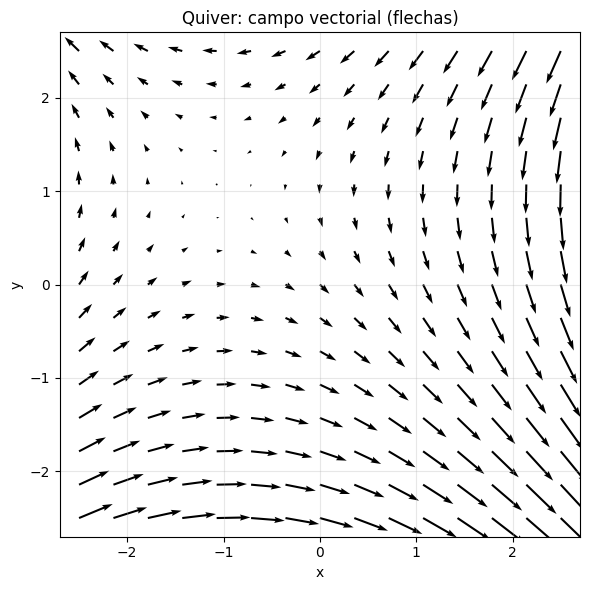

In [126]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Grilla (más espaciada para que las flechas se lean bien)
x = np.linspace(-2.5, 2.5, 15)
y = np.linspace(-2.5, 2.5, 15)
X, Y = np.meshgrid(x, y)

# 2) Campo vectorial (mezcla de rotación + deriva)
U =  1 - Y          # componente en x
V = -1 - X          # componente en y

# 3) Quiver
plt.figure(figsize=(6, 6))
plt.quiver(X, Y, U, V, angles="xy", scale_units="xy", scale=10)

plt.title("Quiver: campo vectorial (flechas)")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-2.7, 2.7)
plt.ylim(-2.7, 2.7)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Gráficos de superficie 3D

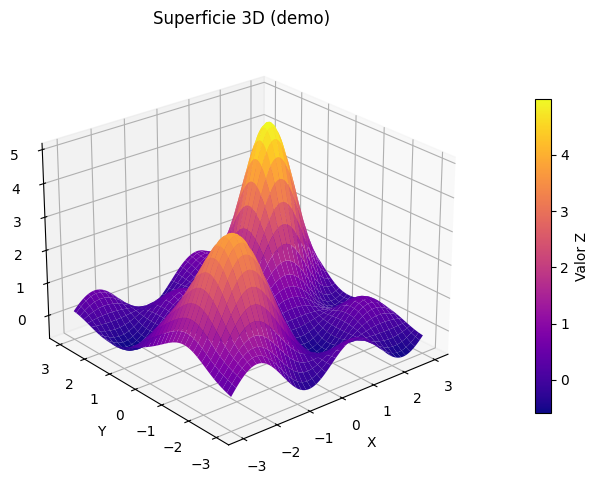

In [127]:
import numpy as np
import matplotlib.pyplot as plt

# Requiere activar el eje 3D (mplot3d)
from mpl_toolkits.mplot3d import Axes3D  # (no se usa directo, pero asegura el soporte)

# 1) Grilla (X, Y)
x = np.linspace(-3, 3, 120)
y = np.linspace(-3, 3, 120)
X, Y = np.meshgrid(x, y)

# 2) Superficie (Z): mezcla de "cerros" + ondas suaves
Z = (
    5*np.exp(-((X-1.6)**2 + (Y-1.2)**2)) +
    4*np.exp(-((X+1.8)**2 + (Y+1.4)**2)/1.2) +
    0.6*np.sin(2*X)*np.cos(2*Y)
)

# 3) Plot 3D
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=True)

ax.set_title("Superficie 3D (demo)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Colorbar (como en la imagen)
fig.colorbar(surf, ax=ax, shrink=0.7, pad=0.08, label="Valor Z")

# Vista (ángulo)
ax.view_init(elev=25, azim=230)

plt.tight_layout()
plt.show()


## Gráficos de dispersión 3D

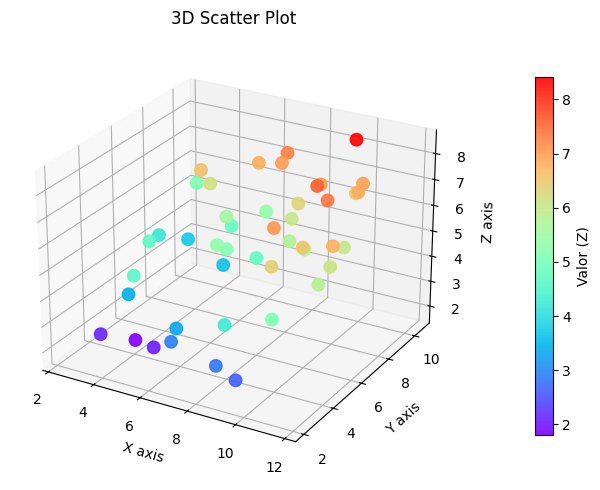

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# Para reproducibilidad
rng = np.random.default_rng(42)

# Datos simulados (3 variables numéricas)
n = 45
x = rng.uniform(2, 12, n)
y = rng.uniform(2, 12, n)
z = 0.35*x + 0.45*y + rng.normal(0, 1.0, n)  # relación + ruido

# Color según Z (o cualquier variable que quieras)
c = z

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(x, y, z, c=c, cmap="rainbow", s=80, alpha=0.9)

ax.set_title("3D Scatter Plot")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

# Barra de color (como en la imagen)
cb = plt.colorbar(sc, ax=ax, pad=0.1, shrink=0.8)
cb.set_label("Valor (Z)")

# Ángulo de vista (opcional, ayuda a que se vea como “demo”)
ax.view_init(elev=25, azim=-60)

plt.tight_layout()
plt.show()


## Gráficos de barras 3D

/tmp/ipython-input-644834805.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


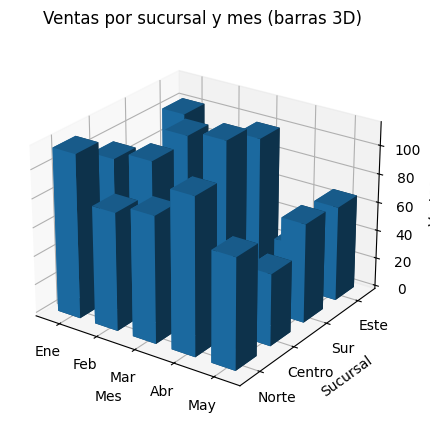

In [129]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(7)

# Categorías
sucursales = ["Norte", "Centro", "Sur", "Este"]
meses = ["Ene", "Feb", "Mar", "Abr", "May"]

nx = len(meses)
ny = len(sucursales)

# Matriz de valores (ventas simuladas)
Z = rng.integers(20, 120, size=(ny, nx))

# Coordenadas para barras
xpos, ypos = np.meshgrid(np.arange(nx), np.arange(ny))
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)

dx = 0.6 * np.ones_like(xpos)
dy = 0.6 * np.ones_like(ypos)
dz = Z.ravel()

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection="3d")

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, shade=True)

ax.set_title("Ventas por sucursal y mes (barras 3D)")
ax.set_xlabel("Mes")
ax.set_ylabel("Sucursal")
ax.set_zlabel("Ventas")

ax.set_xticks(np.arange(nx) + 0.3)
ax.set_xticklabels(meses)

ax.set_yticks(np.arange(ny) + 0.3)
ax.set_yticklabels(sucursales)

ax.view_init(elev=25, azim=-55)
plt.tight_layout()
plt.show()


## Gráficos de contorno 3D

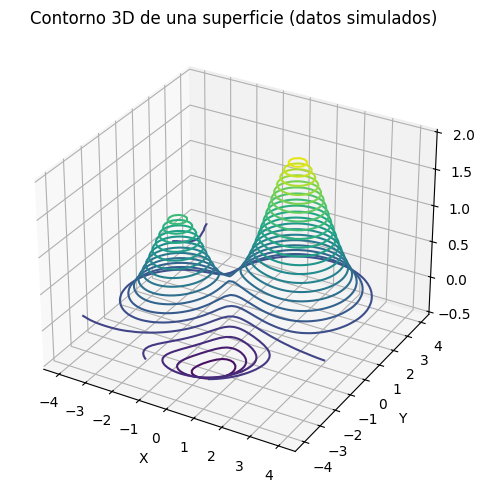

In [130]:
import numpy as np
import matplotlib.pyplot as plt

# Mallado
x = np.linspace(-4, 4, 60)
y = np.linspace(-4, 4, 60)
X, Y = np.meshgrid(x, y)

# Superficie (dos "cerros" + valle)
Z = (
    2*np.exp(-((X-1.5)**2 + (Y-1.0)**2)/2.0)
    + 1.5*np.exp(-((X+1.5)**2 + (Y+1.2)**2)/1.5)
    - 0.6*np.exp(-((X)**2 + (Y+2.0)**2)/3.0)
)

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection="3d")

# Contornos en 3D (proyección al "piso")
ax.contour3D(X, Y, Z, 25)

ax.set_title("Contorno 3D de una superficie (datos simulados)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.view_init(elev=30, azim=-60)
plt.tight_layout()
plt.show()


## Personalización de la leyenda


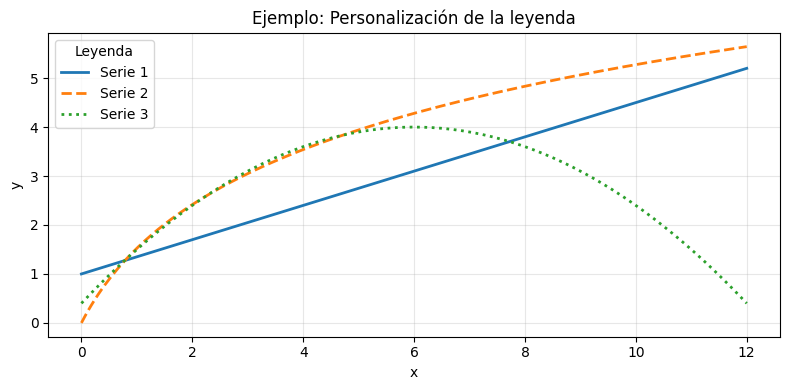

In [131]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 12, 200)

y1 = 0.35 * x + 1
y2 = np.log1p(x) * 2.2
y3 = -0.10 * (x - 6)**2 + 4  # parábola (sube y baja)

plt.figure(figsize=(8, 4))

plt.plot(x, y1, label="Serie 1", linewidth=2)
plt.plot(x, y2, label="Serie 2", linestyle="--", linewidth=2)
plt.plot(x, y3, label="Serie 3", linestyle=":", linewidth=2)

plt.title("Ejemplo: Personalización de la leyenda")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)

# Leyenda personalizada
plt.legend(
    title="Leyenda",
    loc="upper left",      # posición
    frameon=True,          # caja
    fancybox=True,         # bordes redondeados
    shadow=False,
    ncol=1,                # columnas
)

plt.tight_layout()
plt.show()


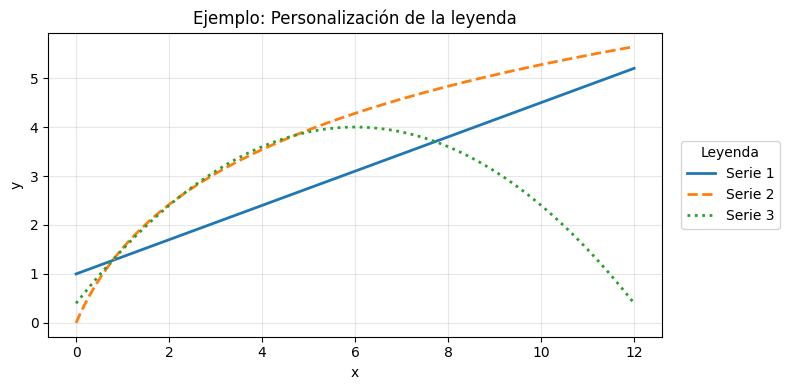

In [132]:
# Leyenda fuera del gráfico
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 12, 200)

y1 = 0.35 * x + 1
y2 = np.log1p(x) * 2.2
y3 = -0.10 * (x - 6)**2 + 4  # parábola (sube y baja)

plt.figure(figsize=(8, 4))

plt.plot(x, y1, label="Serie 1", linewidth=2)
plt.plot(x, y2, label="Serie 2", linestyle="--", linewidth=2)
plt.plot(x, y3, label="Serie 3", linestyle=":", linewidth=2)

plt.title("Ejemplo: Personalización de la leyenda")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(alpha=0.3)

# Leyenda personalizada
plt.legend(
    title="Leyenda",
    loc="upper left",      # posición
    frameon=True,          # caja
    fancybox=True,         # bordes redondeados
    shadow=False,
    ncol=1,                # columnas
)
plt.legend(title="Leyenda", loc="center left", bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
plt.show()


## Uso de colormaps

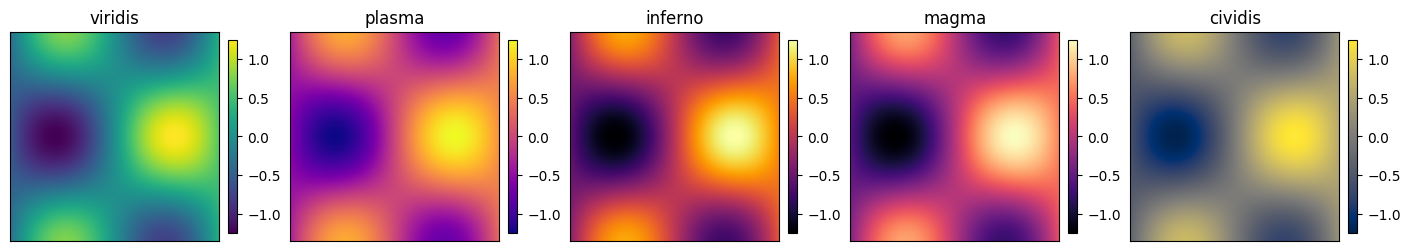

In [133]:
import numpy as np
import matplotlib.pyplot as plt

# Datos 2D simulados
x = np.linspace(-3, 3, 150)
y = np.linspace(-3, 3, 150)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y) + 0.15 * X

colormaps = ["viridis", "plasma", "inferno", "magma", "cividis"]

fig, axes = plt.subplots(1, len(colormaps), figsize=(14, 3), constrained_layout=True)

for ax, cmap in zip(axes, colormaps):
    im = ax.imshow(Z, cmap=cmap, origin="lower")
    ax.set_title(cmap)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.show()


## **LIVE CODING**

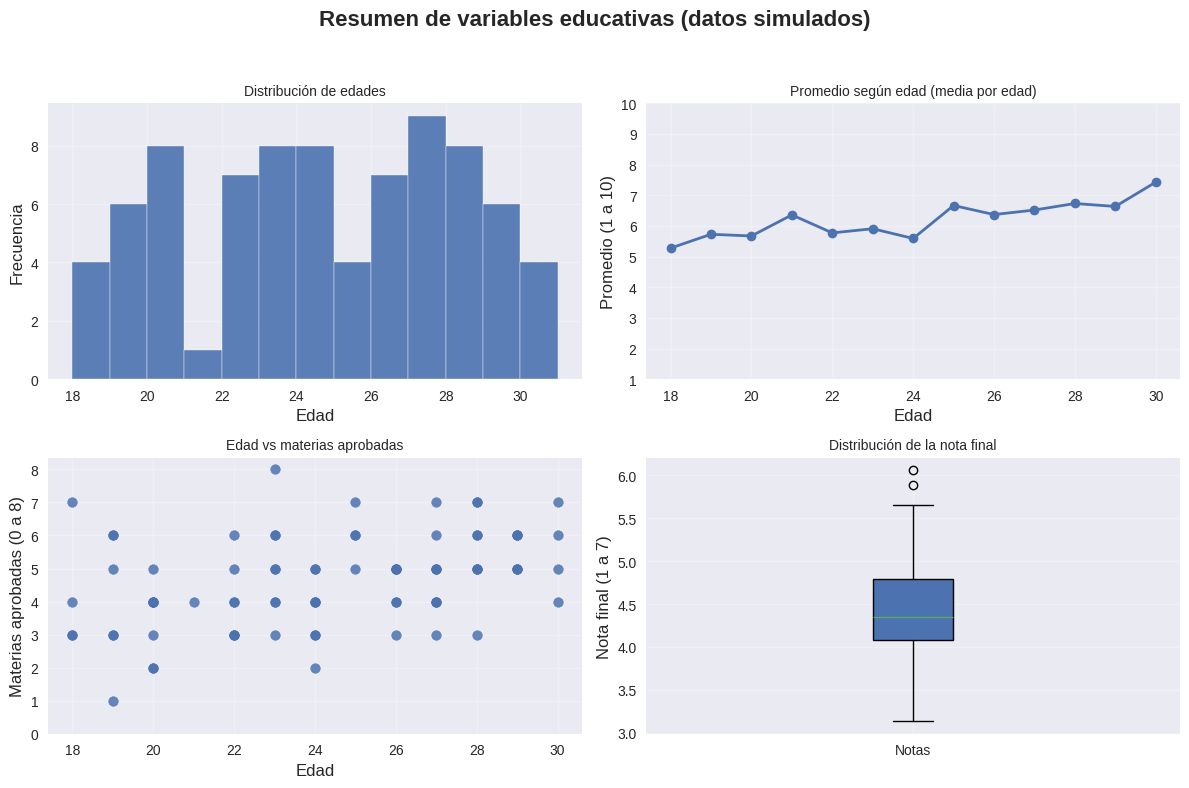

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) Simular datos (educativos)
# -----------------------------
rng = np.random.default_rng(42)
n = 80

edad = rng.integers(18, 31, size=n)  # 18 a 30
# Promedio (1 a 10), con leve tendencia a subir con la edad + ruido
promedio = 5.5 + 0.12*(edad - 18) + rng.normal(0, 0.8, size=n)
promedio = np.clip(promedio, 1, 10)

# Materias aprobadas (0 a 8), relacionada con promedio + ruido
materias = np.round((promedio - 1) / 9 * 8 + rng.normal(0, 1.2, size=n)).astype(int)
materias = np.clip(materias, 0, 8)

# Nota final (1 a 7), derivada del promedio + algo de ruido
nota_final = 1 + (promedio - 1) * (6/9) + rng.normal(0, 0.4, size=n)
nota_final = np.clip(nota_final, 1, 7)

# -----------------------------
# 2) Crear figura 2x2
# -----------------------------
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Resumen de variables educativas (datos simulados)", fontsize=16, fontweight="bold")

# -----------------------------
# Gráfico 1: histograma de edad
# -----------------------------
axs[0, 0].hist(edad, bins=np.arange(18, 32), edgecolor="white", alpha=0.9)
axs[0, 0].set_title("Distribución de edades")
axs[0, 0].set_xlabel("Edad")
axs[0, 0].set_ylabel("Frecuencia")
axs[0, 0].grid(alpha=0.25)

# ---------------------------------------------------
# Gráfico 2: línea del promedio según edad (promedio)
# ---------------------------------------------------
# Para que tenga sentido como "evolución", agregamos por edad (media)
edades_unicas = np.arange(18, 31)
prom_por_edad = [promedio[edad == e].mean() if np.any(edad == e) else np.nan for e in edades_unicas]

axs[0, 1].plot(edades_unicas, prom_por_edad, marker="o", linewidth=2)
axs[0, 1].set_title("Promedio según edad (media por edad)")
axs[0, 1].set_xlabel("Edad")
axs[0, 1].set_ylabel("Promedio (1 a 10)")
axs[0, 1].set_ylim(1, 10)
axs[0, 1].grid(alpha=0.25)

# ----------------------------------------------
# Gráfico 3: scatter edad vs materias aprobadas
# ----------------------------------------------
axs[1, 0].scatter(edad, materias, alpha=0.85)
axs[1, 0].set_title("Edad vs materias aprobadas")
axs[1, 0].set_xlabel("Edad")
axs[1, 0].set_ylabel("Materias aprobadas (0 a 8)")
axs[1, 0].set_yticks(range(0, 9))
axs[1, 0].grid(alpha=0.25)

# -----------------------------
# Gráfico 4: boxplot nota final
# -----------------------------
axs[1, 1].boxplot(nota_final, vert=True, patch_artist=True)
axs[1, 1].set_title("Distribución de la nota final")
axs[1, 1].set_ylabel("Nota final (1 a 7)")
axs[1, 1].set_xticks([1])
axs[1, 1].set_xticklabels(["Notas"])
axs[1, 1].grid(alpha=0.25)

# -----------------------------
# 3) Ajuste final y exportación
# -----------------------------
plt.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio para el suptitle
fig.savefig("resumen_educativo_4_subplots.png", dpi=300, bbox_inches="tight")

plt.show()


# **EJERCICIO 2**

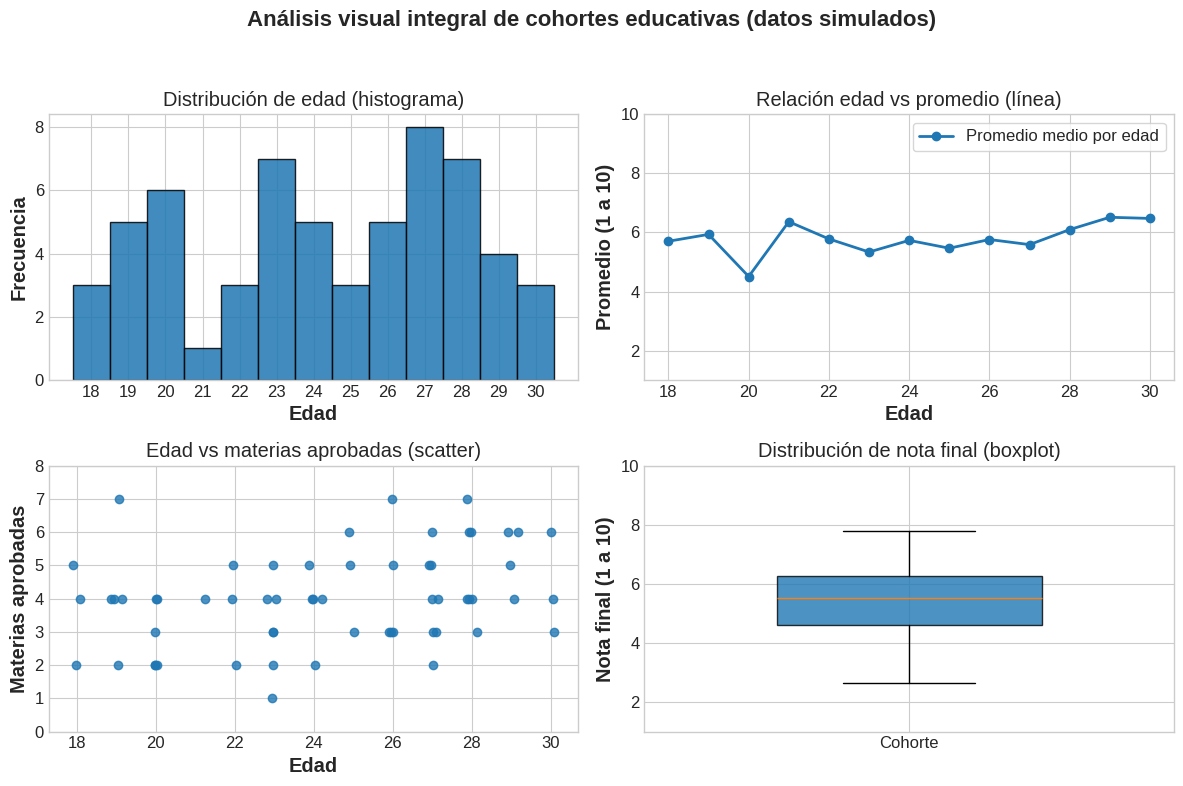

Figura guardada en: panel_cohorte_educativa.png


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1) Simular datos (>=60 estudiantes)
# -----------------------------
rng = np.random.default_rng(42)
n = 60

edad = rng.integers(18, 31, size=n)  # 18 a 30

# Promedio (1 a 10) con ligera relación con edad + ruido, y acotado a [1, 10]
promedio = 5.5 + 0.08*(edad - 22) + rng.normal(0, 1.1, size=n)
promedio = np.clip(promedio, 1, 10)

# Materias aprobadas (0 a 8), correlacionado con promedio
materias_aprobadas = np.round(np.clip((promedio - 1) / 9 * 8 + rng.normal(0, 1.0, size=n), 0, 8)).astype(int)

# Nota final (1 a 10) combinando promedio + componente extra + ruido
nota_final = 0.75*promedio + 0.25*(materias_aprobadas/8*10) + rng.normal(0, 0.6, size=n)
nota_final = np.clip(nota_final, 1, 10)

df = pd.DataFrame({
    "edad": edad,
    "promedio": promedio,
    "materias_aprobadas": materias_aprobadas,
    "nota_final": nota_final
})

# -----------------------------
# 2) Figura con 2x2 subplots + estilo
# -----------------------------
plt.style.use("seaborn-v0_8-whitegrid")  # si tu entorno no lo tiene, usa "ggplot"

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Análisis visual integral de cohortes educativas (datos simulados)", fontsize=16, fontweight="bold")

# --- (A) Histograma de edad
ax = axs[0, 0]
bins = np.arange(df["edad"].min(), df["edad"].max() + 2) - 0.5  # bins centrados en enteros
ax.hist(df["edad"], bins=bins, edgecolor="black", alpha=0.85)
ax.set_title("Distribución de edad (histograma)")
ax.set_xlabel("Edad")
ax.set_ylabel("Frecuencia")
ax.set_xticks(sorted(df["edad"].unique()))

# --- (B) Línea: promedio según edad (promedio por edad)
ax = axs[0, 1]
prom_por_edad = df.groupby("edad", as_index=False)["promedio"].mean().sort_values("edad")
ax.plot(prom_por_edad["edad"], prom_por_edad["promedio"], marker="o", linewidth=2, label="Promedio medio por edad")
ax.set_title("Relación edad vs promedio (línea)")
ax.set_xlabel("Edad")
ax.set_ylabel("Promedio (1 a 10)")
ax.set_ylim(1, 10)
ax.legend(loc="best", frameon=True)

# --- (C) Scatter: edad vs materias aprobadas (con jitter suave para que no se monten)
ax = axs[1, 0]
jitter = rng.normal(0, 0.08, size=n)
ax.scatter(df["edad"] + jitter, df["materias_aprobadas"], alpha=0.8)
ax.set_title("Edad vs materias aprobadas (scatter)")
ax.set_xlabel("Edad")
ax.set_ylabel("Materias aprobadas")
ax.set_yticks(range(0, 9))

# --- (D) Boxplot: nota final
ax = axs[1, 1]
bp = ax.boxplot(df["nota_final"], vert=True, patch_artist=True, widths=0.5)
# “toque” visual simple (sin volverse loco)
for box in bp["boxes"]:
    box.set_alpha(0.8)

ax.set_title("Distribución de nota final (boxplot)")
ax.set_ylabel("Nota final (1 a 10)")
ax.set_xticks([1])
ax.set_xticklabels(["Cohorte"])
ax.set_ylim(1, 10)

# -----------------------------
# 3) Ajustes finales + exportación
# -----------------------------
fig.tight_layout(rect=[0, 0, 1, 0.95])  # deja espacio para el suptitle

output_path = "panel_cohorte_educativa.png"
fig.savefig(output_path, dpi=200, bbox_inches="tight")
plt.show()

print(f"Figura guardada en: {output_path}")
